# Time Series Anomaly Detection Using Isolation Forest

In this notebook, we'll explore a methodology for detecting anomalies in time series data using the Isolation Forest algorithm. We'll walk through the steps of preprocessing, feature extraction, model training, and evaluation. Finally, we'll visualize the results to better understand the performance of our model.



In [1]:
#Importing necessary libraries
import sys
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, roc_auc_score


## Preprocessing

In this sections, we'll load the time series data from files, handle any missing or non-numeric values, and normalize the data. Normalization is crucial because it brings all data values into the same range, making the model training more effective.


In [2]:
#increasing the field size limit for large CSV files
csv.field_size_limit(sys.maxsize)

#loading anomaly types mapping from a CSV file
anomaly_types_df = pd.read_csv('/Users/tinahajinejad/Downloads/anomaly_types.csv', delimiter=';')

#creating a dictionary to map filenames to their respective anomaly types
filename_to_anomaly_type = {}
for _, row in anomaly_types_df.iterrows():
    filename_to_anomaly_type[row['name']] = row['anomaly_type_2']

#the folder path containing the time series datasets
folder_path = '/Users/tinahajinejad/Desktop/ALS new project/AnomalyDatasets_2021/UCR_TimeSeriesAnomalyDatasets2021/FilesAreInHere/UCR_Anomaly_FullData'

#loading and preprocessing time series data
def load_time_series(file_path):
    """
    Load time series data from a file and handle missing or non-numeric values.
    """
    data = pd.read_csv(file_path, header=None, sep='\t' if any(str(num) in file_path for num in [204, 205, 206, 207, 208, 225, 226, 242, 243]) else ',', engine='python')
    data = data.apply(pd.to_numeric, errors='coerce')
    return data.values.flatten()


## Feature Extraction

We extract statistical features from sliding windows over the time series. These features include mean, standard deviation, minimum and maximum values, and percentiles. Feature extraction helps the model focus on the most informative parts of the data, enhancing its ability to detect anomalies.


In [3]:

def extract_features(ts, window_size=100):
    """
    Extract statistical features from sliding windows of the time series.
    """
    features = []
    for i in range(0, len(ts) - window_size + 1, window_size):
        window = ts[i:i + window_size]
        features.append([
            np.mean(window),
            np.std(window),
            np.min(window),
            np.max(window),
            np.percentile(window, 25),
            np.percentile(window, 75)
        ])
    return np.array(features)


In [4]:
#evaluating the model's performance
def evaluate_prediction(predicted_center, anomaly_start, anomaly_end):
    L = anomaly_end - anomaly_start + 1
    min_val = min(anomaly_start - L, anomaly_start - 100)
    max_val = max(anomaly_end + L, anomaly_end + 100)
    return min_val < predicted_center < max_val

## Model Training

We train the Isolation Forest model on the features extracted from the normal portion of the time series data. In order to reduce file size, I have only shown the plot for the correct predictions.

Processing file: 183_UCR_Anomaly_qtdbSel100MLII_4000_13400_13800.txt
Processing file: 194_UCR_Anomaly_sddb49_20000_67950_68200.txt
Processing file: 069_UCR_Anomaly_DISTORTEDinsectEPG5_3200_8500_8501.txt
Processing file: 023_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z5_5000_8612_8716.txt
Processing file: 212_UCR_Anomaly_Italianpowerdemand_8913_29480_29504.txt
Processing file: 180_UCR_Anomaly_ltstdbs30791ES_20000_52600_52800.txt
Processing file: 058_UCR_Anomaly_DISTORTEDapneaecg_10000_12240_12308.txt
Processing file: 130_UCR_Anomaly_GP711MarkerLFM5z4_4000_6527_6645.txt
Processing file: 079_UCR_Anomaly_DISTORTEDresperation2_30000_168250_168250.txt
Processing file: 224_UCR_Anomaly_mit14046longtermecg_76123_191200_191700.txt
Processing file: 044_UCR_Anomaly_DISTORTEDPowerDemand1_9000_18485_18821.txt
Processing file: 233_UCR_Anomaly_mit14157longtermecg_18913_24500_24501.txt
Processing file: 042_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG6_7000_12190_12420.txt
Correct prediction for 042_UCR_Anomaly_DIST

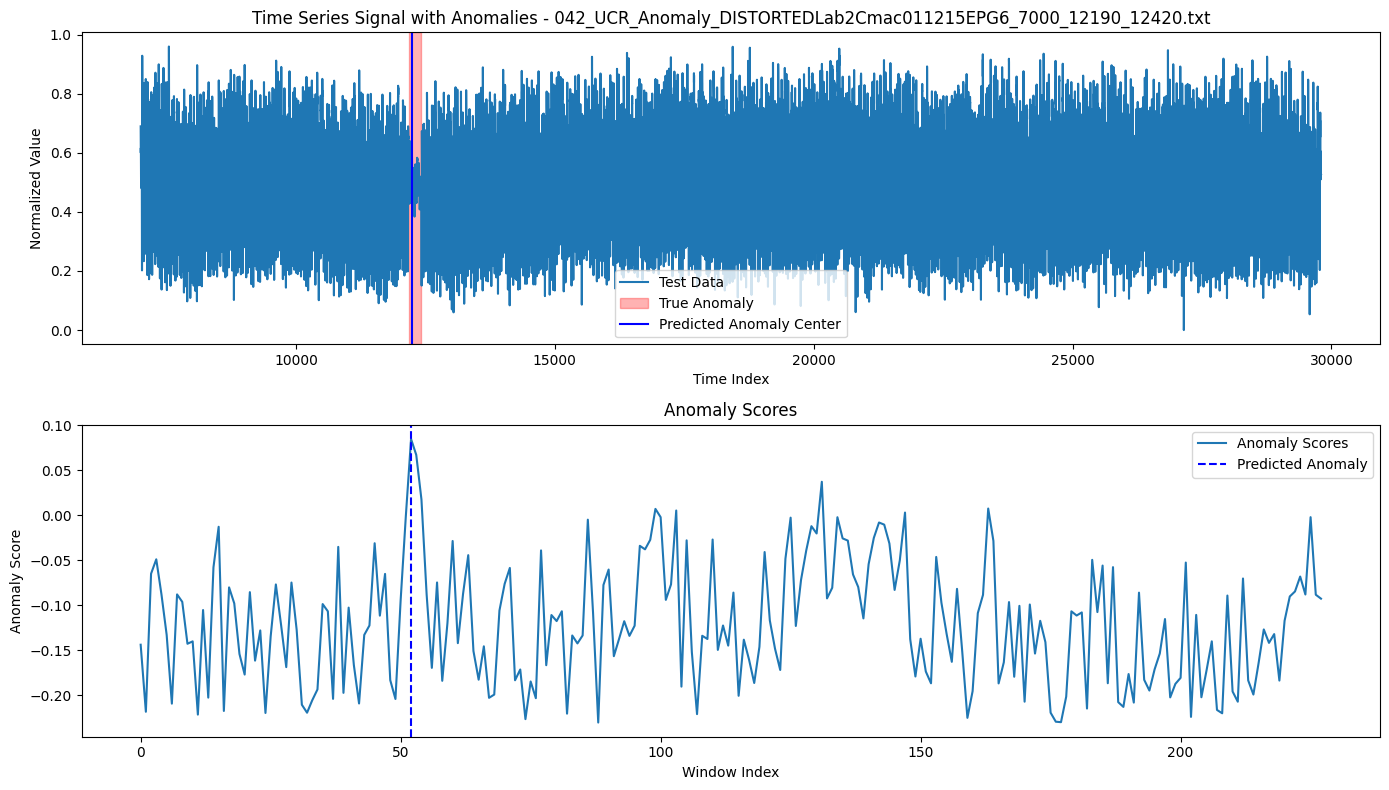

Processing file: 114_UCR_Anomaly_CIMIS44AirTemperature2_4000_5703_5727.txt
Processing file: 204_UCR_Anomaly_CHARISfive_12412_15000_15070.txt
Skipping 204_UCR_Anomaly_CHARISfive_12412_15000_15070.txt due to empty feature extraction.
Processing file: 241_UCR_Anomaly_taichidbS0715Master_250000_837400_839100.txt
Processing file: 028_UCR_Anomaly_DISTORTEDInternalBleeding17_1600_3198_3309.txt
Processing file: 026_UCR_Anomaly_DISTORTEDInternalBleeding15_1700_5684_5854.txt
Processing file: 092_UCR_Anomaly_DISTORTEDtiltAPB4_20000_67995_67996.txt
Processing file: 214_UCR_Anomaly_STAFFIIIDatabase_34211_125720_126370.txt
Processing file: 070_UCR_Anomaly_DISTORTEDltstdbs30791AI_17555_52600_52800.txt
Correct prediction for 070_UCR_Anomaly_DISTORTEDltstdbs30791AI_17555_52600_52800.txt.


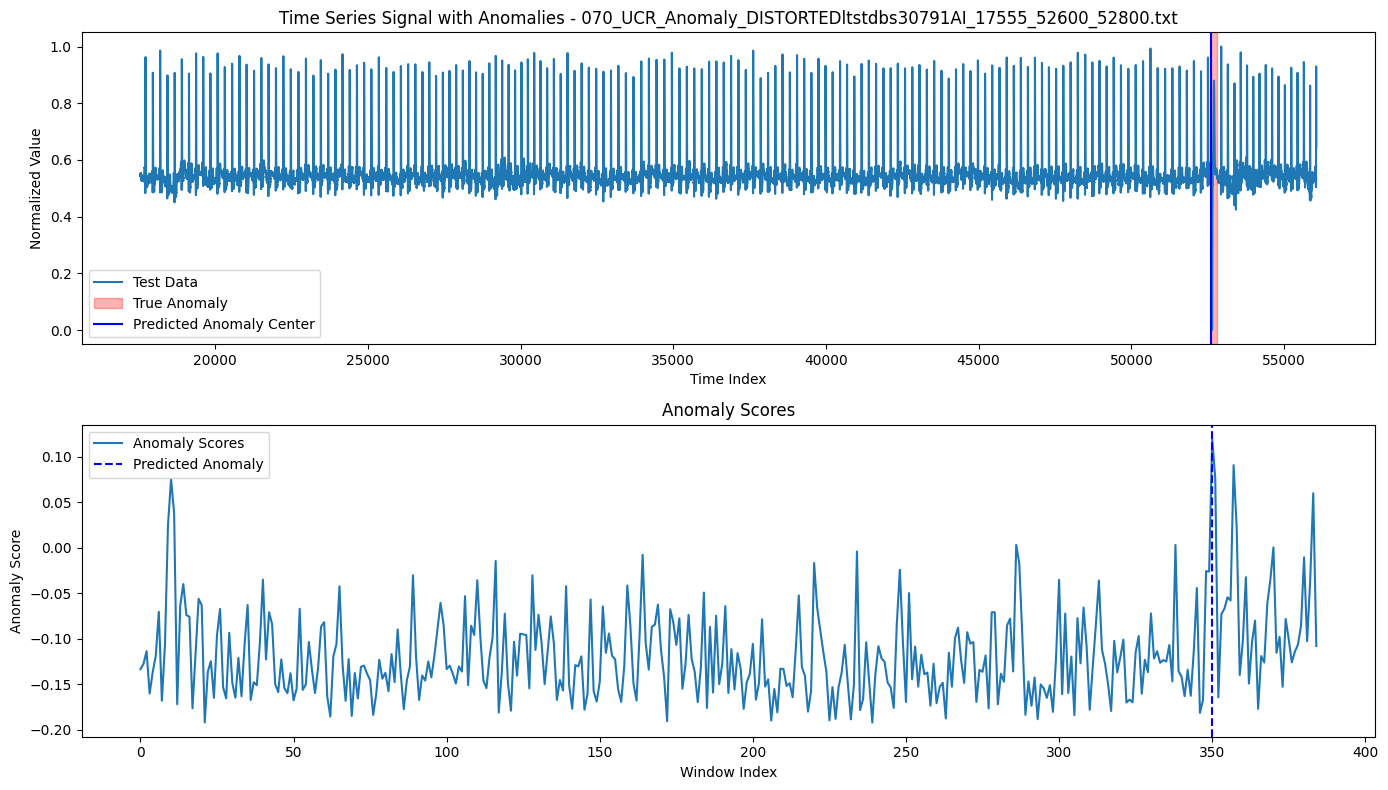

Processing file: 006_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature2_4000_5703_5727.txt
Processing file: 036_UCR_Anomaly_DISTORTEDInternalBleeding9_4200_6599_6681.txt
Processing file: 198_UCR_Anomaly_tiltAPB2_50000_124159_124985.txt
Processing file: 149_UCR_Anomaly_Lab2Cmac011215EPG5_7000_17390_17520.txt
Correct prediction for 149_UCR_Anomaly_Lab2Cmac011215EPG5_7000_17390_17520.txt.


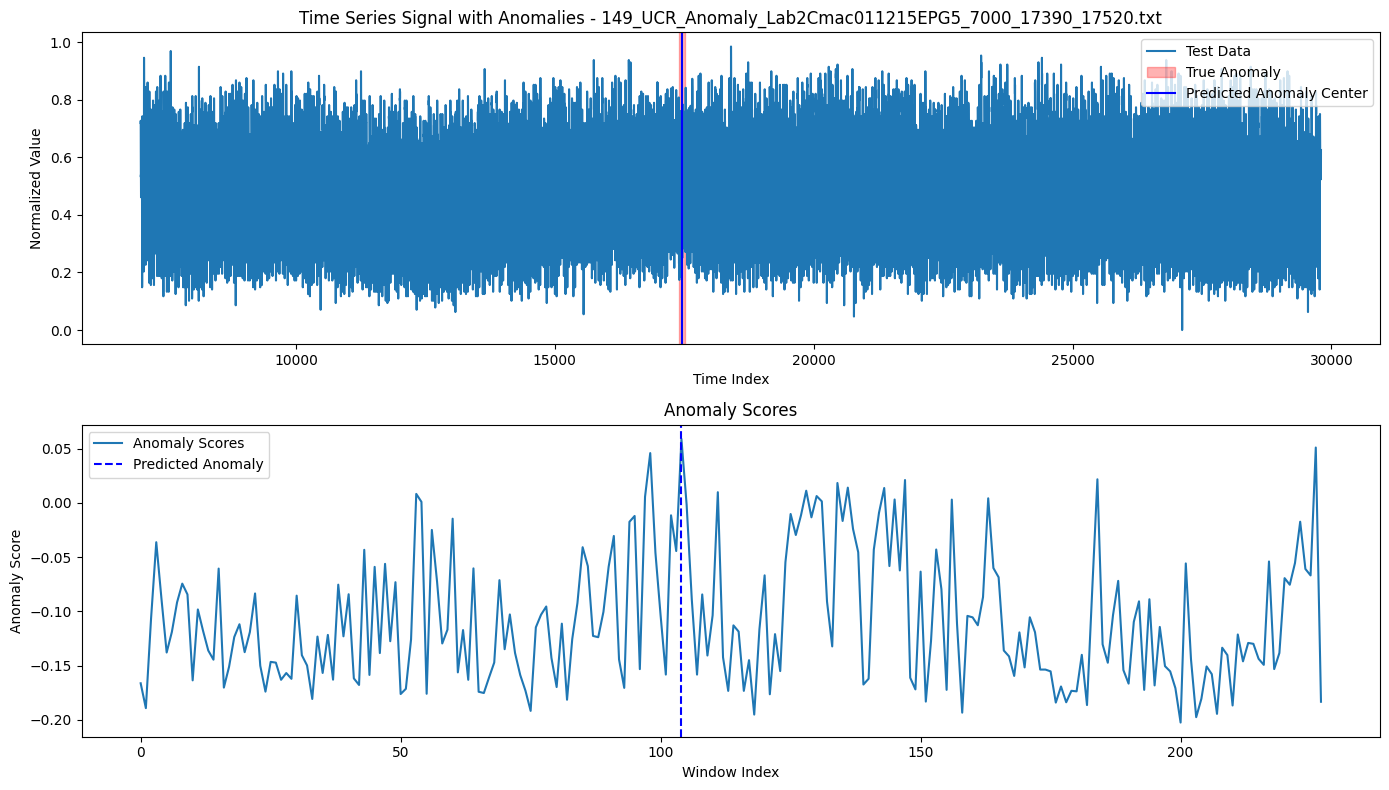

Processing file: 032_UCR_Anomaly_DISTORTEDInternalBleeding4_1000_4675_5033.txt
Processing file: 099_UCR_Anomaly_NOISEInternalBleeding6_1500_3474_3629.txt
Correct prediction for 099_UCR_Anomaly_NOISEInternalBleeding6_1500_3474_3629.txt.


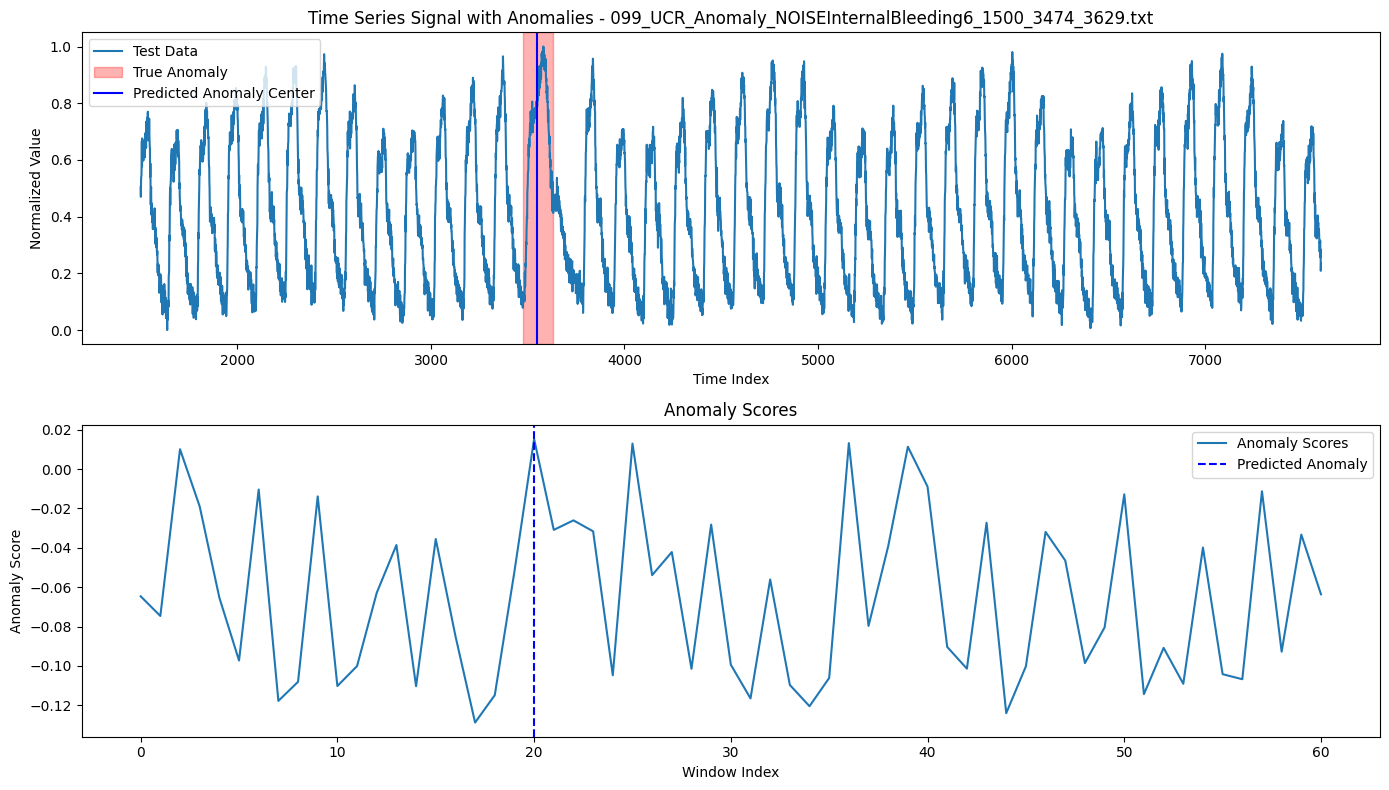

Processing file: 137_UCR_Anomaly_InternalBleeding18_2300_4485_4587.txt
Processing file: 216_UCR_Anomaly_STAFFIIIDatabase_37216_160720_161370.txt
Processing file: 057_UCR_Anomaly_DISTORTEDapneaecg4_6000_16000_16100.txt
Processing file: 087_UCR_Anomaly_DISTORTEDsel840mECG1_17000_51370_51740.txt
Processing file: 103_UCR_Anomaly_NOISETkeepThirdMARS_3500_4711_4809.txt
Processing file: 223_UCR_Anomaly_mit14046longtermecg_74123_131200_131700.txt
Processing file: 179_UCR_Anomaly_ltstdbs30791AS_23000_52600_52800.txt
Correct prediction for 179_UCR_Anomaly_ltstdbs30791AS_23000_52600_52800.txt.


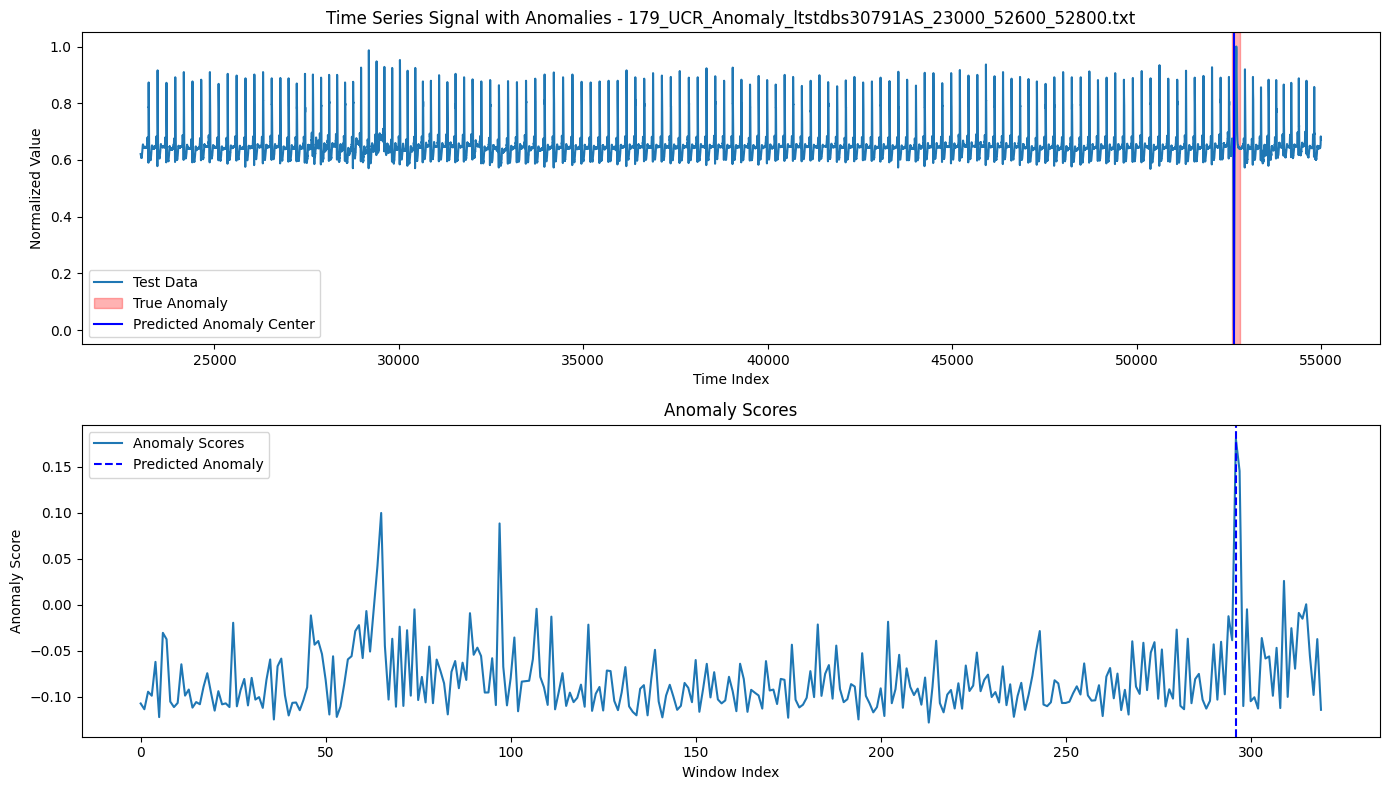

Processing file: 178_UCR_Anomaly_ltstdbs30791AI_17555_52600_52800.txt
Correct prediction for 178_UCR_Anomaly_ltstdbs30791AI_17555_52600_52800.txt.


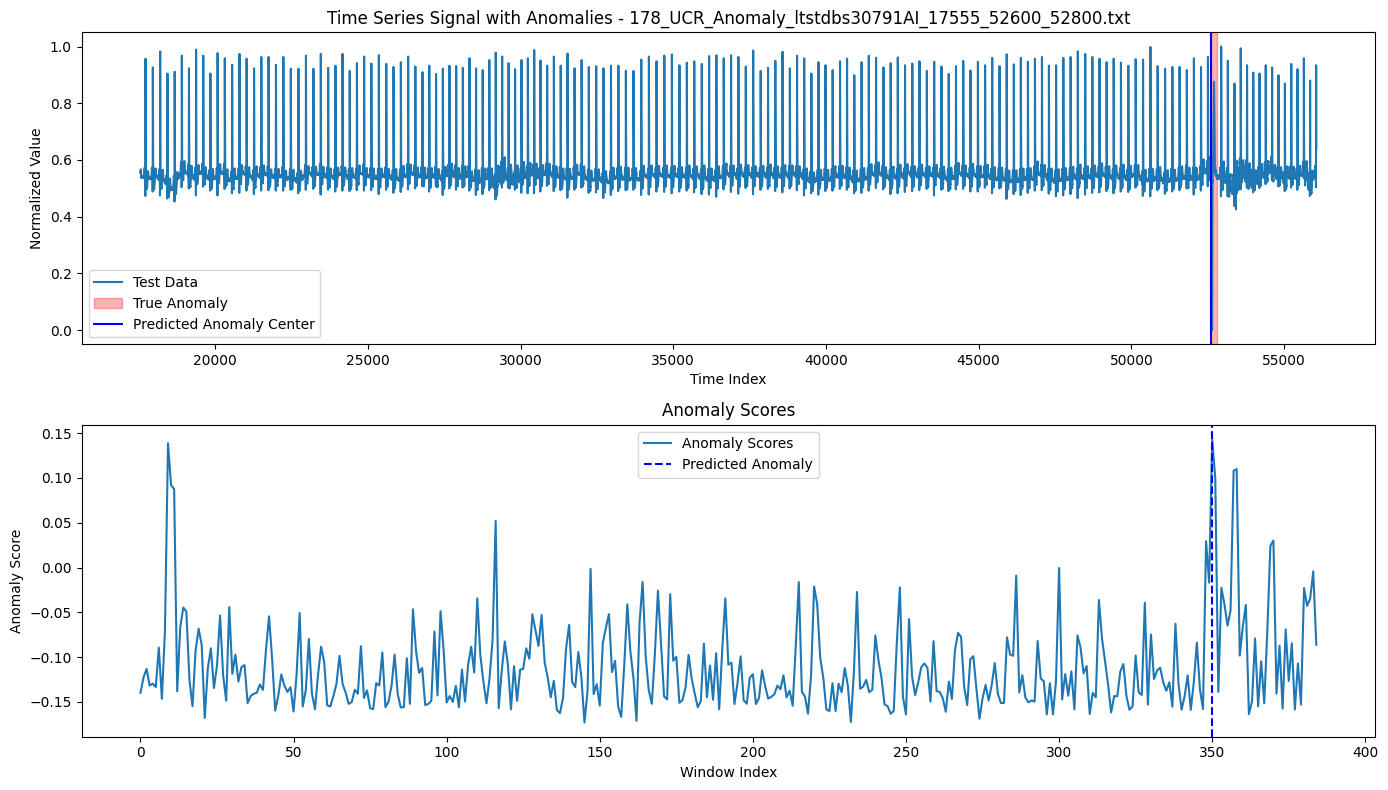

Processing file: 189_UCR_Anomaly_resperation3_45000_158250_158251.txt
Processing file: 225_UCR_Anomaly_mit14046longtermecg_81214_143000_143300.txt
Skipping 225_UCR_Anomaly_mit14046longtermecg_81214_143000_143300.txt due to empty feature extraction.
Processing file: 190_UCR_Anomaly_resperation4_70000_128430_128431.txt
Processing file: 229_UCR_Anomaly_mit14134longtermecg_16363_57960_57970.txt
Processing file: 186_UCR_Anomaly_resperation1_100000_110260_110412.txt
Processing file: 064_UCR_Anomaly_DISTORTEDgaitHunt3_23400_38400_39200.txt
Processing file: 219_UCR_Anomaly_STAFFIIIDatabase_41612_64632_64852.txt
Processing file: 172_UCR_Anomaly_gaitHunt3_23400_38400_39200.txt
Processing file: 144_UCR_Anomaly_InternalBleeding9_4200_6599_6681.txt
Processing file: 027_UCR_Anomaly_DISTORTEDInternalBleeding16_1200_4187_4199.txt
Processing file: 033_UCR_Anomaly_DISTORTEDInternalBleeding5_4000_6200_6370.txt
Processing file: 005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature1_4000_5391_5392.txt
Processing 

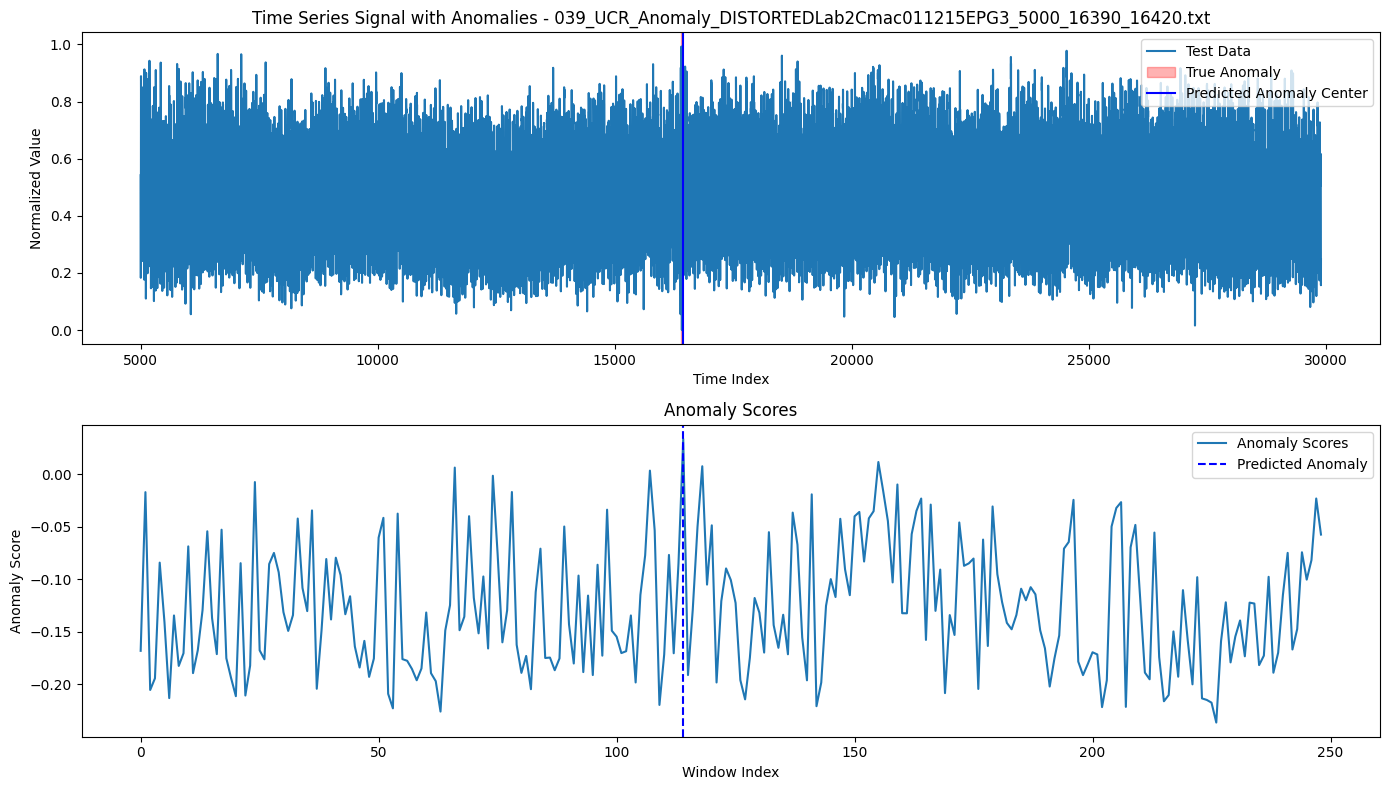

Processing file: 111_UCR_Anomaly_3sddb40_35000_46600_46900.txt
Processing file: 150_UCR_Anomaly_Lab2Cmac011215EPG6_7000_12190_12420.txt
Correct prediction for 150_UCR_Anomaly_Lab2Cmac011215EPG6_7000_12190_12420.txt.


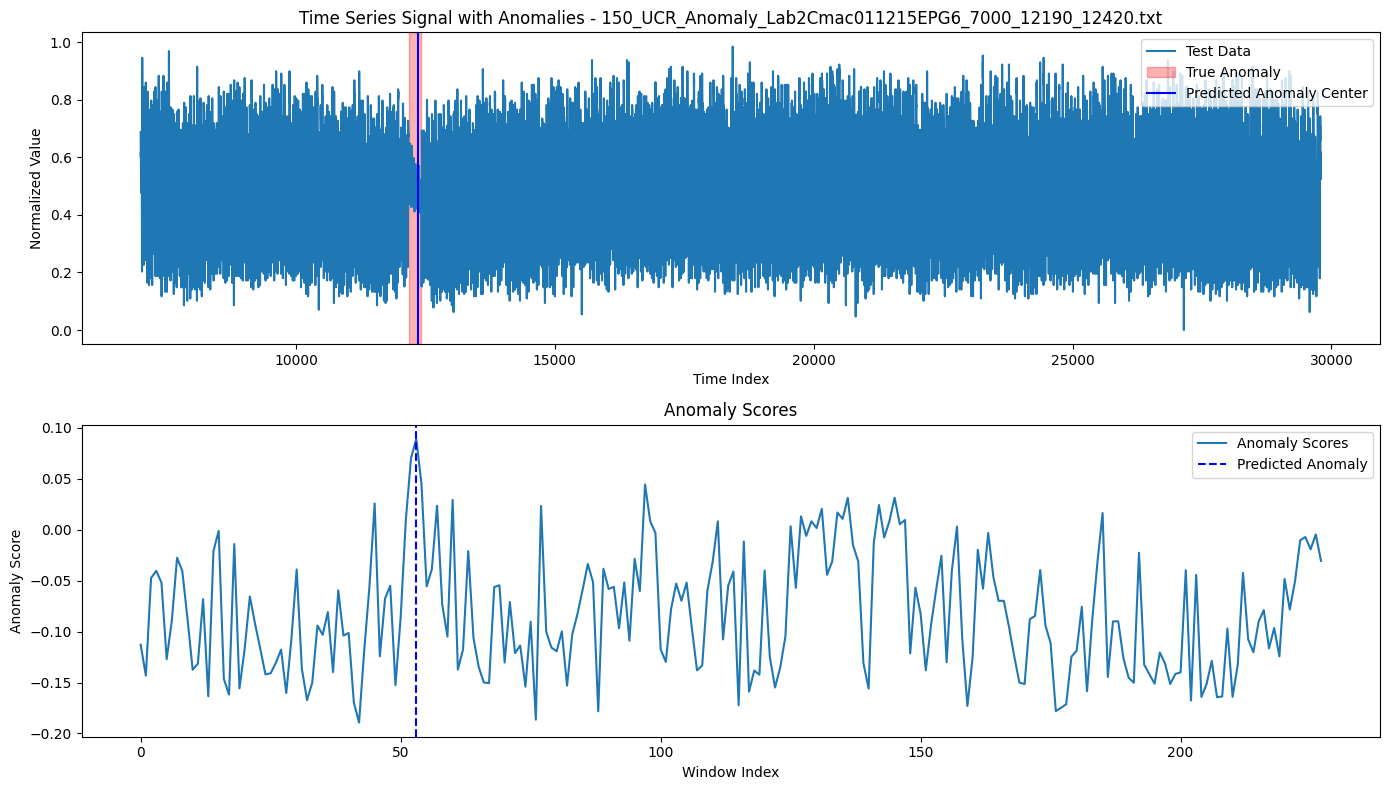

Processing file: 002_UCR_Anomaly_DISTORTED2sddb40_35000_56600_56900.txt
Processing file: 221_UCR_Anomaly_STAFFIIIDatabase_45616_163632_164852.txt
Processing file: 077_UCR_Anomaly_DISTORTEDresperation11_58000_110800_110801.txt
Processing file: 227_UCR_Anomaly_mit14134longtermecg_11231_29000_29100.txt
Processing file: 222_UCR_Anomaly_mit14046longtermecg_56123_91200_91700.txt
Processing file: 066_UCR_Anomaly_DISTORTEDinsectEPG2_3700_8000_8025.txt
Processing file: 013_UCR_Anomaly_DISTORTEDECG3_15000_16000_16100.txt
Processing file: 051_UCR_Anomaly_DISTORTEDTkeepSecondMARS_3500_9330_9340.txt
Processing file: 163_UCR_Anomaly_apneaecg2_10000_20950_21100.txt
Correct prediction for 163_UCR_Anomaly_apneaecg2_10000_20950_21100.txt.


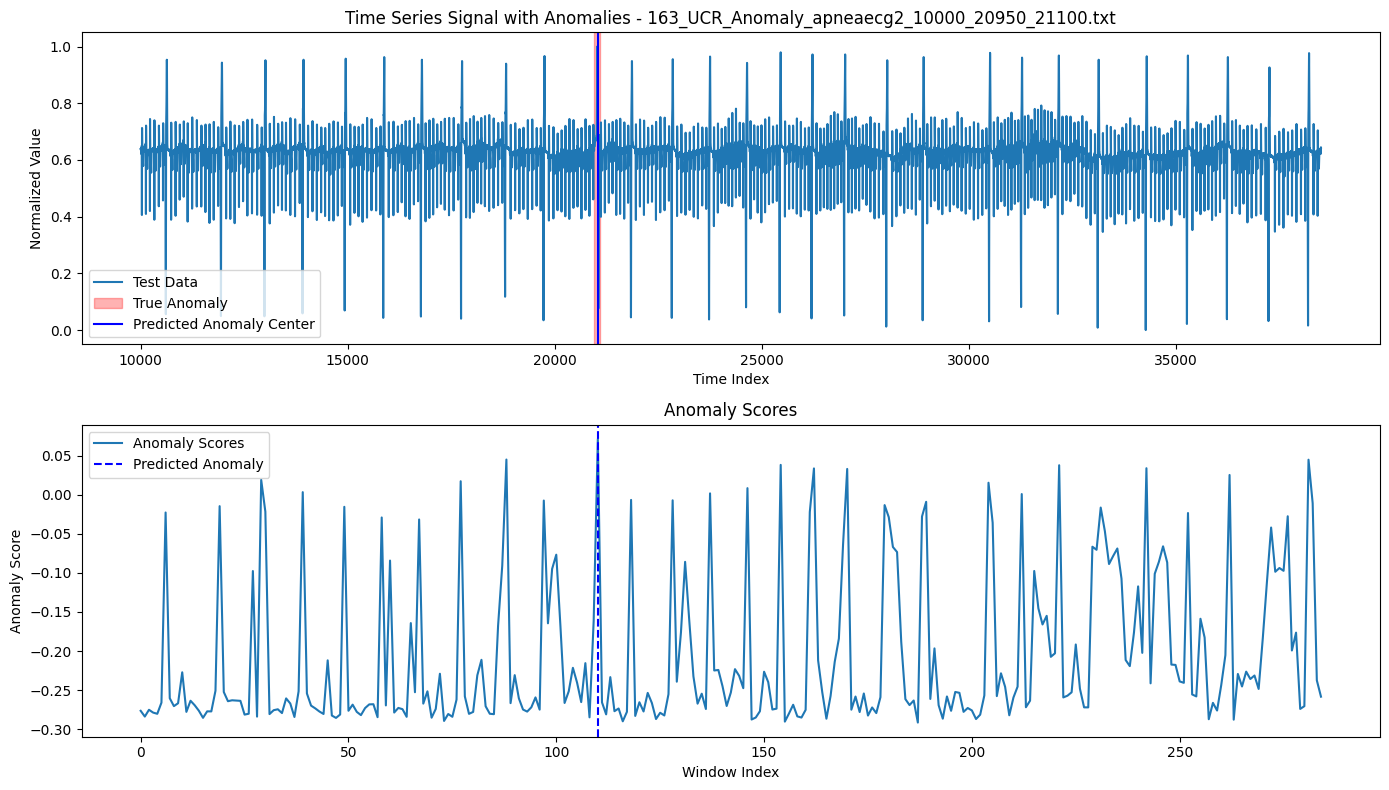

Processing file: 141_UCR_Anomaly_InternalBleeding5_4000_6200_6370.txt
Processing file: 041_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG5_7000_17390_17520.txt
Processing file: 151_UCR_Anomaly_MesoplodonDensirostris_10000_19280_19440.txt
Processing file: 213_UCR_Anomaly_STAFFIIIDatabase_33211_126920_127370.txt
Processing file: 016_UCR_Anomaly_DISTORTEDECG4_5000_16900_17100.txt
Processing file: 074_UCR_Anomaly_DISTORTEDqtdbSel1005V_4000_12400_12800.txt
Processing file: 045_UCR_Anomaly_DISTORTEDPowerDemand2_14000_23357_23717.txt
Processing file: 247_UCR_Anomaly_tilt12755mtable_50211_121900_121980.txt
Processing file: 147_UCR_Anomaly_Lab2Cmac011215EPG3_5000_16390_16420.txt
Correct prediction for 147_UCR_Anomaly_Lab2Cmac011215EPG3_5000_16390_16420.txt.


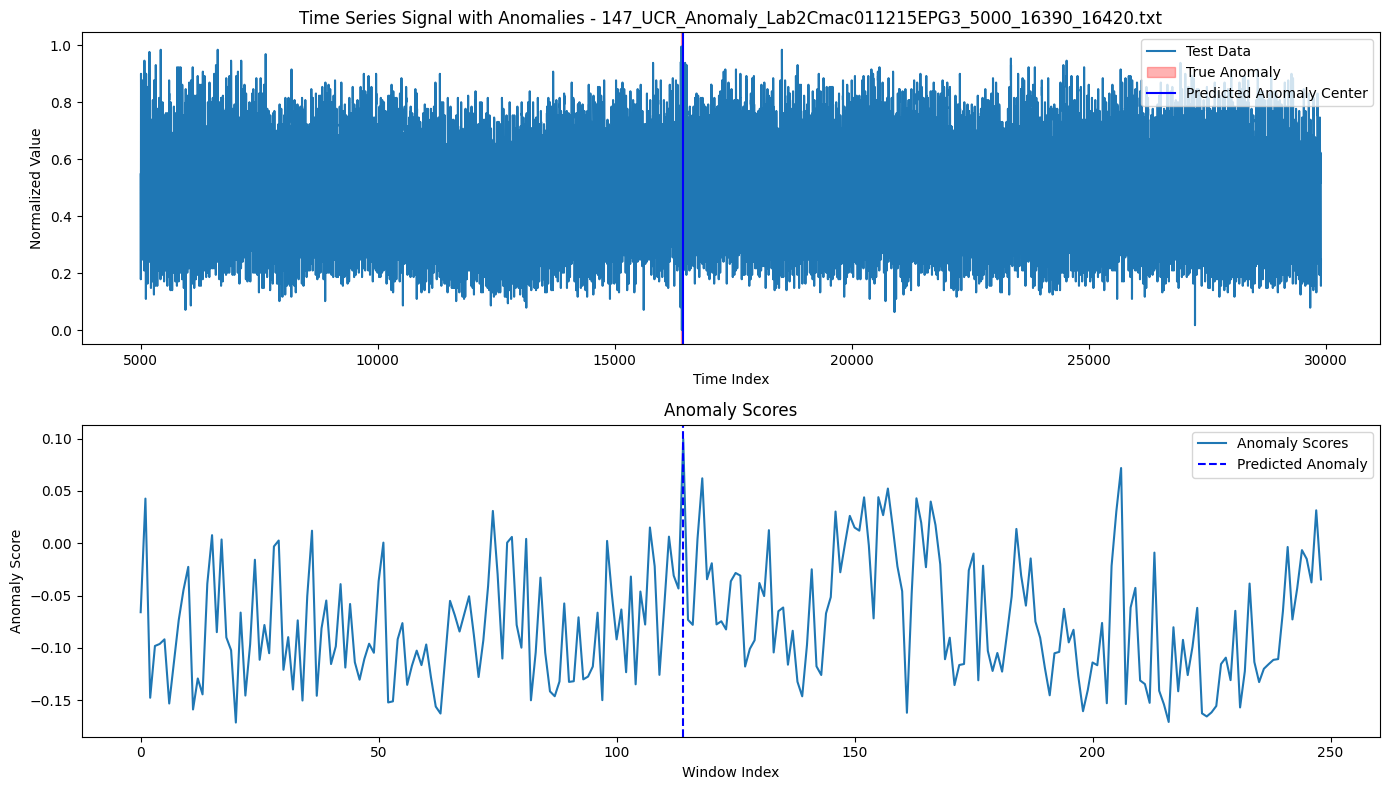

Processing file: 104_UCR_Anomaly_NOISEapneaecg4_6000_16000_16100.txt
Processing file: 062_UCR_Anomaly_DISTORTEDgaitHunt1_18500_33070_33180.txt
Processing file: 108_UCR_Anomaly_NOISEresperation2_30000_168250_168250.txt
Processing file: 125_UCR_Anomaly_ECG4_5000_17000_17100.txt
Processing file: 030_UCR_Anomaly_DISTORTEDInternalBleeding19_3000_4187_4197.txt
Processing file: 106_UCR_Anomaly_NOISEgaitHunt2_18500_31200_31850.txt
Processing file: 146_UCR_Anomaly_Lab2Cmac011215EPG2_5000_27862_27932.txt
Processing file: 084_UCR_Anomaly_DISTORTEDs20101mML2_12000_35774_35874.txt
Processing file: 022_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z4_4000_6527_6645.txt
Processing file: 060_UCR_Anomaly_DISTORTEDgait2_22000_46500_46800.txt
Processing file: 202_UCR_Anomaly_CHARISfive_10411_10998_11028.txt
Processing file: 210_UCR_Anomaly_Italianpowerdemand_36123_74900_74996.txt
Processing file: 242_UCR_Anomaly_tilt12744mtable_100000_104630_104890.txt
Skipping 242_UCR_Anomaly_tilt12744mtable_100000_104630_104890.

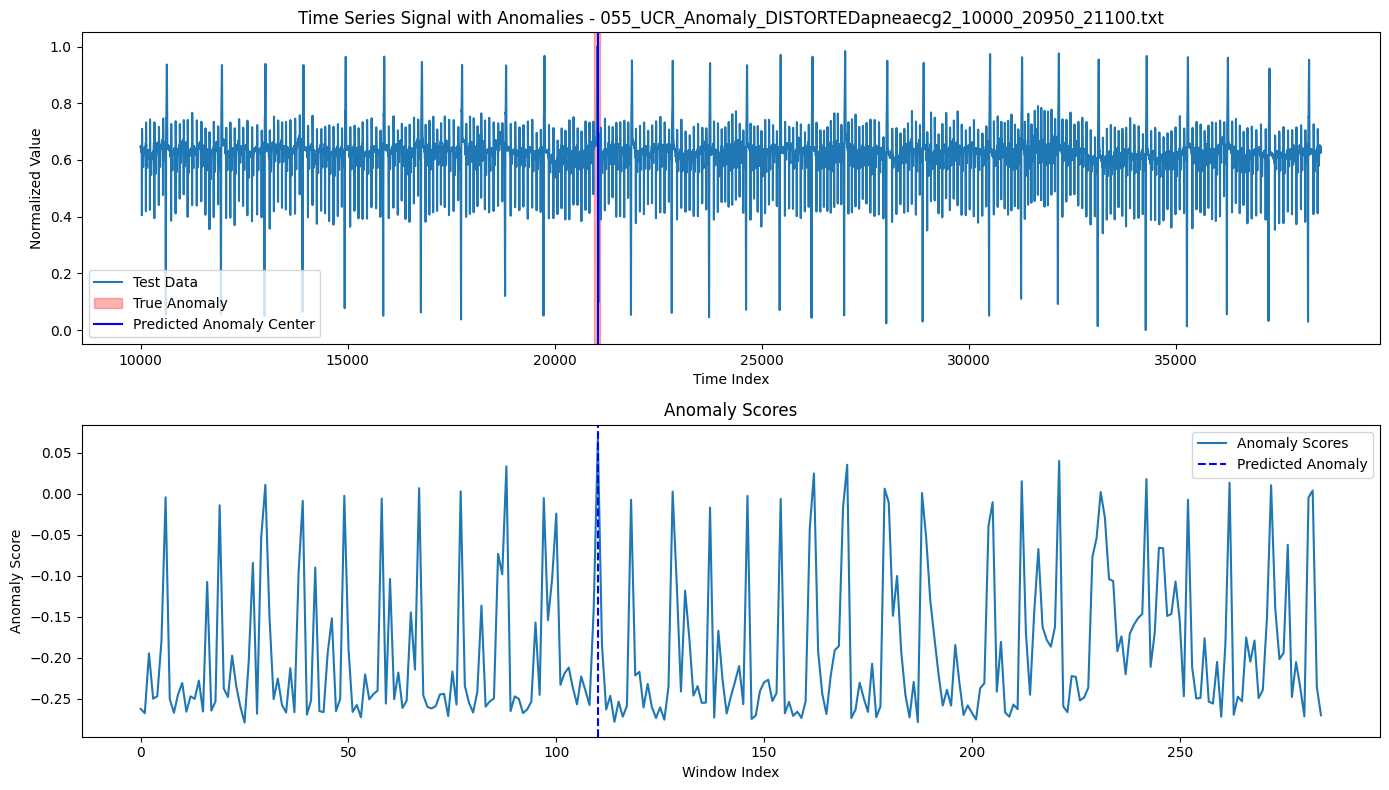

Processing file: 165_UCR_Anomaly_apneaecg4_6000_16000_16100.txt
Processing file: 059_UCR_Anomaly_DISTORTEDgait1_20000_38500_38800.txt
Processing file: 220_UCR_Anomaly_STAFFIIIDatabase_43217_250720_251370.txt
Processing file: 199_UCR_Anomaly_tiltAPB3_40000_114000_114370.txt
Processing file: 048_UCR_Anomaly_DISTORTEDTkeepFifthMARS_3500_5988_6085.txt
Processing file: 193_UCR_Anomaly_s20101m_10000_35774_35874.txt
Processing file: 232_UCR_Anomaly_mit14134longtermecg_8763_57530_57790.txt
Processing file: 152_UCR_Anomaly_PowerDemand1_9000_18485_18821.txt
Processing file: 164_UCR_Anomaly_apneaecg3_5000_11111_11211.txt
Processing file: 020_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z2_5000_7175_7388.txt
Processing file: 244_UCR_Anomaly_tilt12754table_100013_104630_104890.txt
Processing file: 173_UCR_Anomaly_insectEPG1_3000_7000_7030.txt
Processing file: 124_UCR_Anomaly_ECG4_5000_16900_17100.txt
Processing file: 208_UCR_Anomaly_CHARISten_5130_27929_27989.txt
Skipping 208_UCR_Anomaly_CHARISten_5130_2792

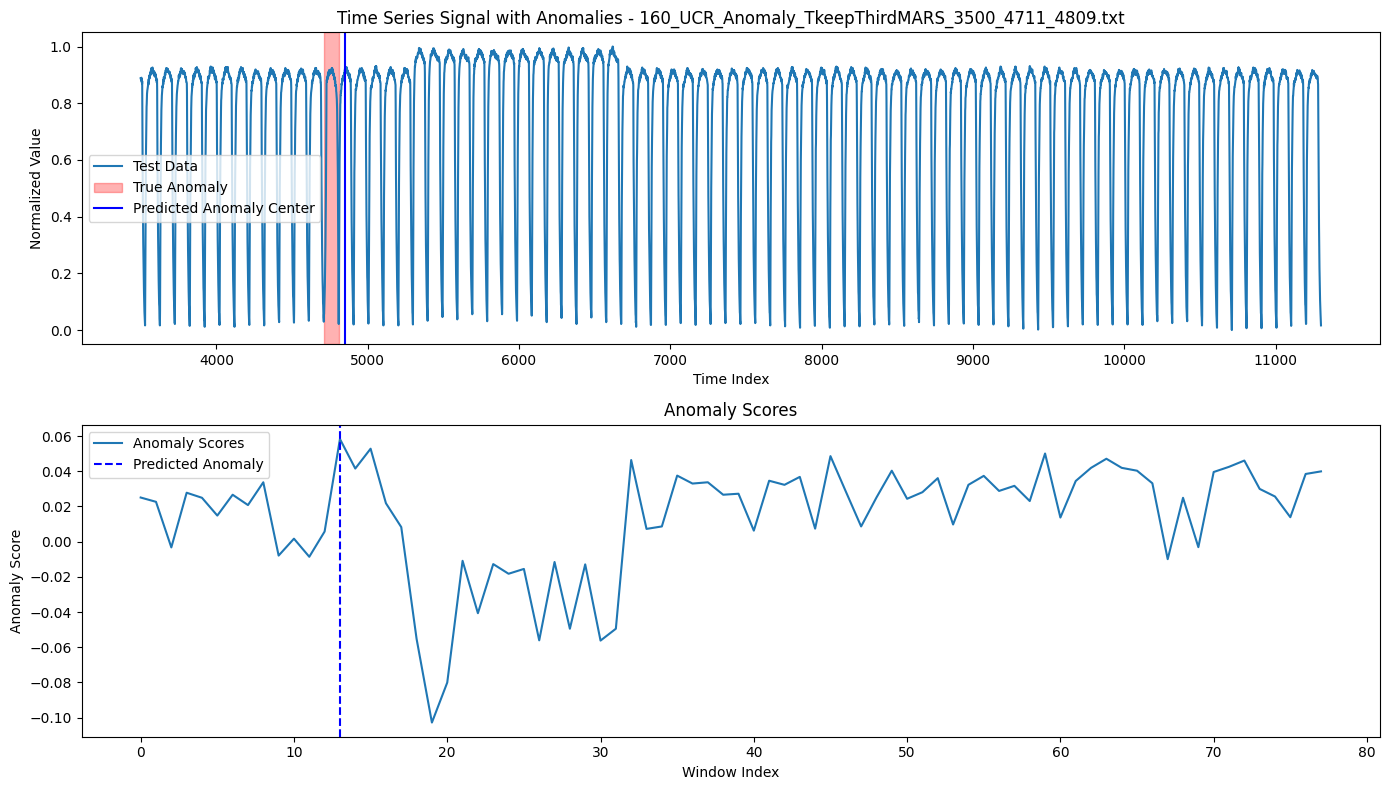

Processing file: 231_UCR_Anomaly_mit14134longtermecg_8763_47530_47790.txt
Correct prediction for 231_UCR_Anomaly_mit14134longtermecg_8763_47530_47790.txt.


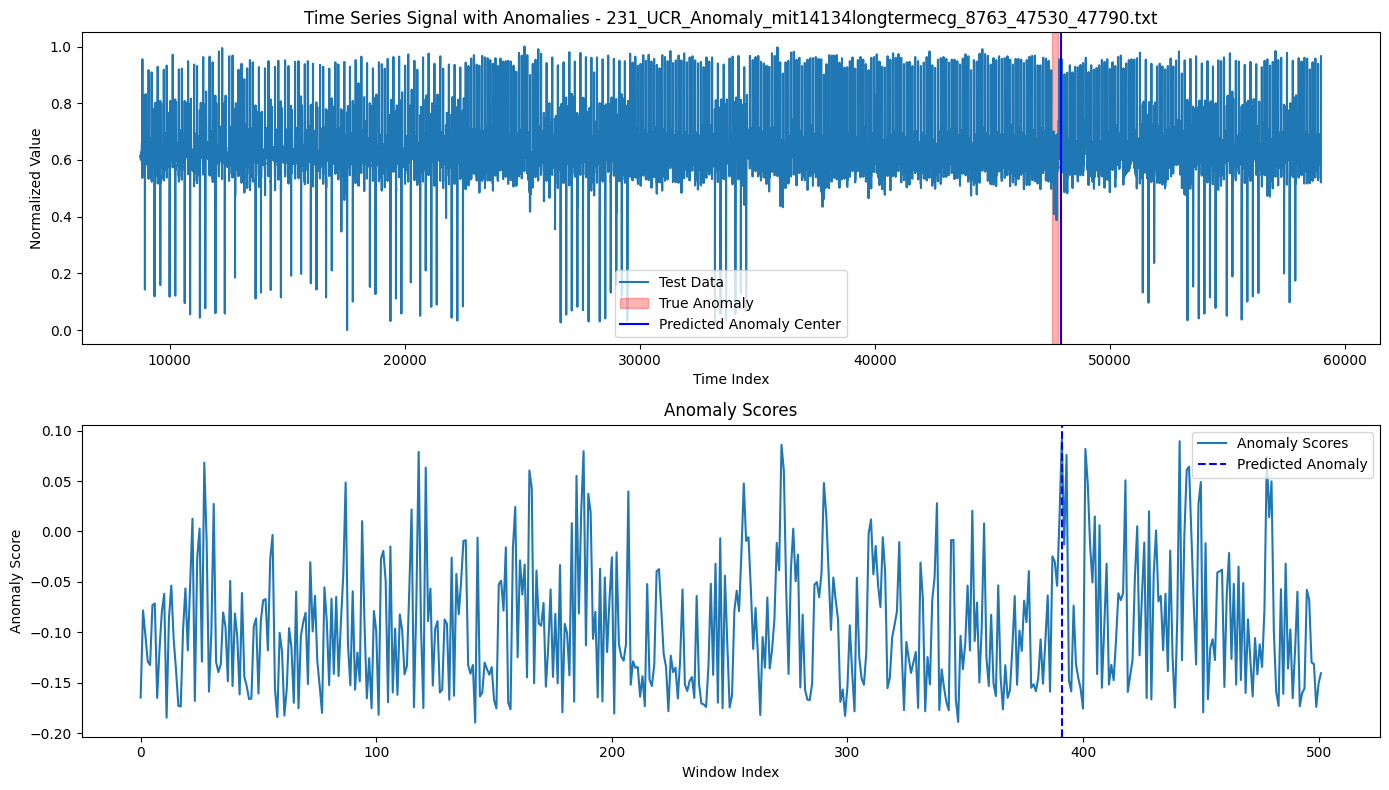

Processing file: 001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_52620.txt
Processing file: 113_UCR_Anomaly_CIMIS44AirTemperature1_4000_5391_5392.txt
Processing file: 040_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG4_6000_17390_17520.txt
Correct prediction for 040_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG4_6000_17390_17520.txt.


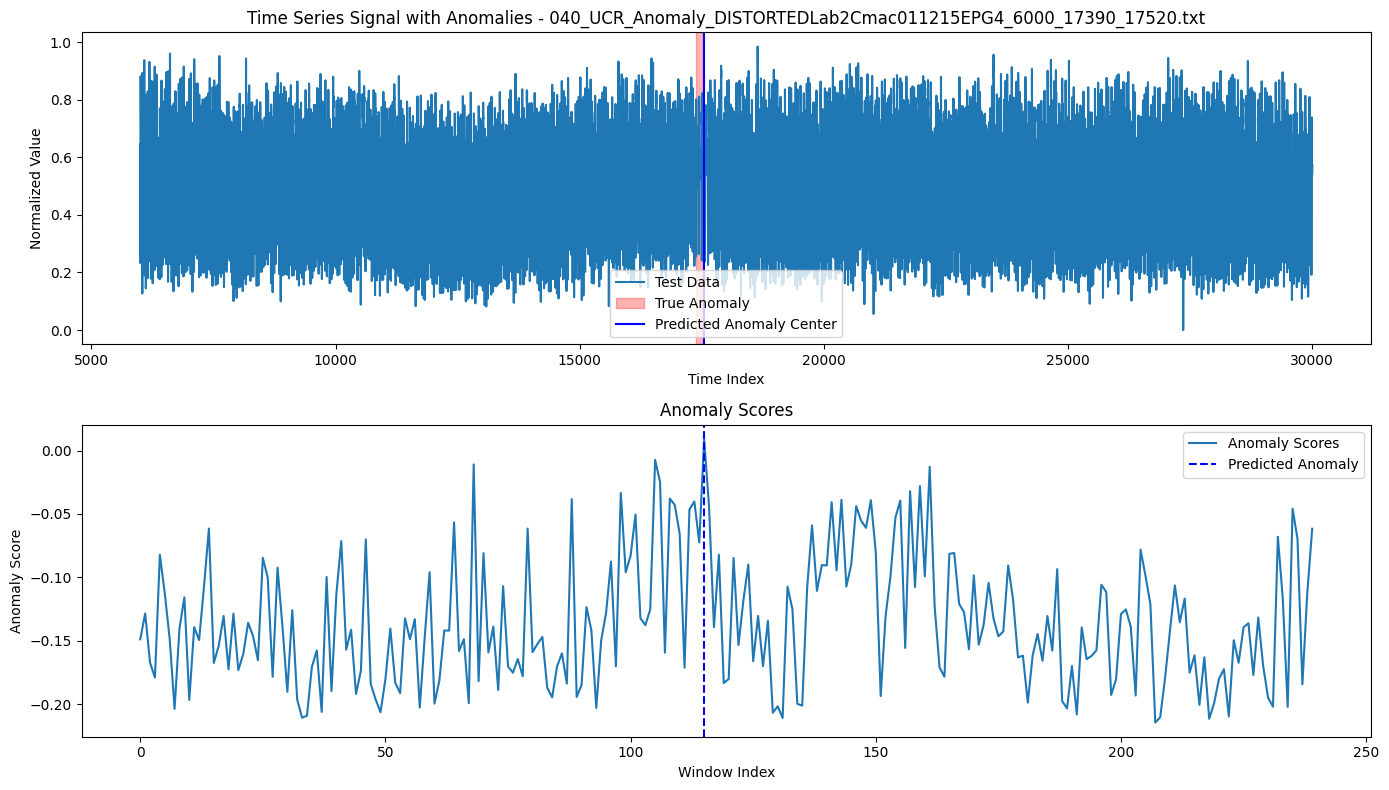

Processing file: 093_UCR_Anomaly_NOISE1sddb40_35000_52000_52620.txt
Processing file: 228_UCR_Anomaly_mit14134longtermecg_11361_47830_47850.txt
Processing file: 102_UCR_Anomaly_NOISEMesoplodonDensirostris_10000_19280_19440.txt
Processing file: 096_UCR_Anomaly_NOISEECG4_5000_16900_17100.txt
Processing file: 136_UCR_Anomaly_InternalBleeding17_1600_3198_3309.txt
Processing file: 082_UCR_Anomaly_DISTORTEDresperation4_70000_128430_128431.txt
Processing file: 097_UCR_Anomaly_NOISEGP711MarkerLFM5z3_5000_5948_5993.txt
Correct prediction for 097_UCR_Anomaly_NOISEGP711MarkerLFM5z3_5000_5948_5993.txt.


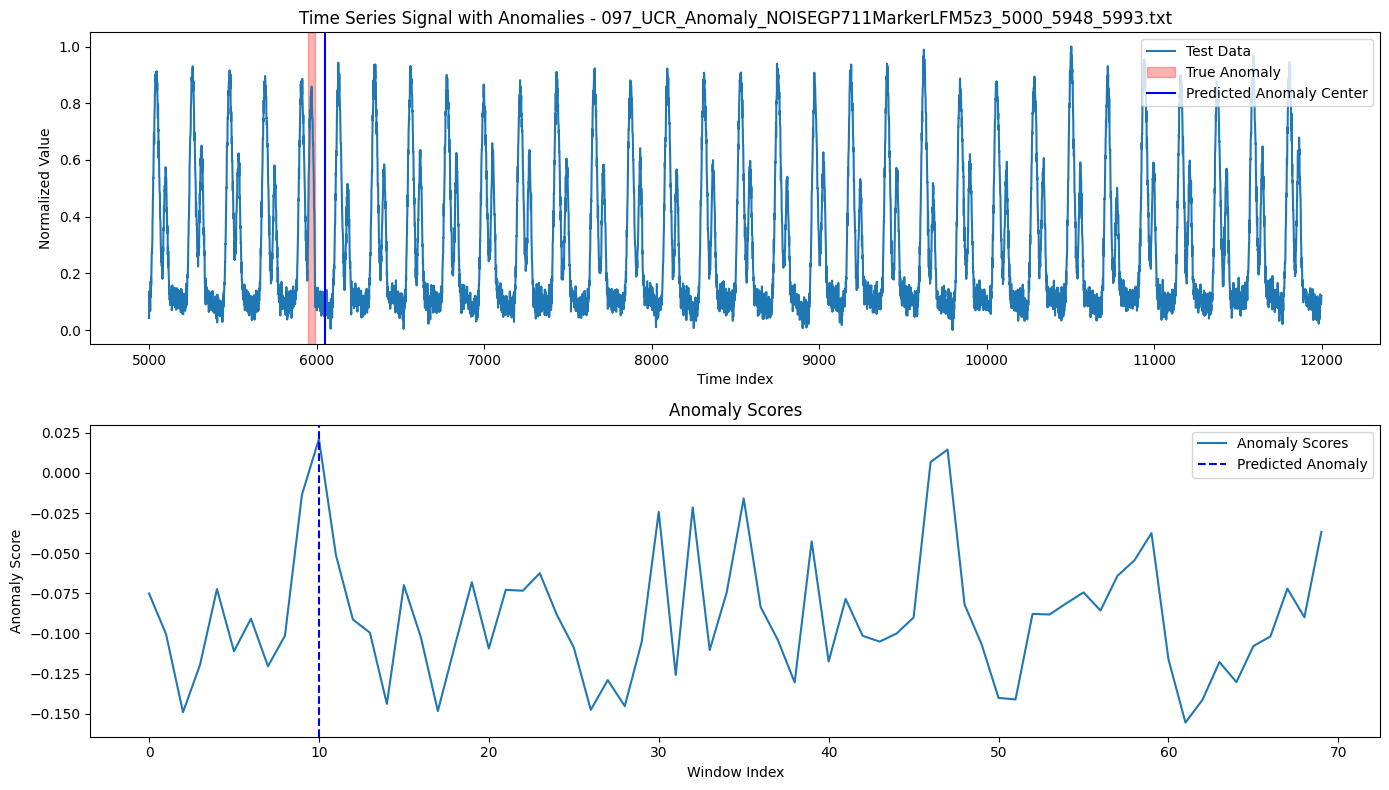

Processing file: 012_UCR_Anomaly_DISTORTEDECG2_15000_16000_16100.txt
Processing file: 246_UCR_Anomaly_tilt12755mtable_100211_270800_271070.txt
Processing file: 107_UCR_Anomaly_NOISEinsectEPG3_5200_7000_7050.txt
Processing file: 120_UCR_Anomaly_ECG2_15000_16000_16100.txt
Processing file: 134_UCR_Anomaly_InternalBleeding15_1700_5684_5854.txt
Processing file: 004_UCR_Anomaly_DISTORTEDBIDMC1_2500_5400_5600.txt
Processing file: 207_UCR_Anomaly_CHARISten_3165_26929_26989.txt
Skipping 207_UCR_Anomaly_CHARISten_3165_26929_26989.txt due to empty feature extraction.
Processing file: 073_UCR_Anomaly_DISTORTEDpark3m_60000_72150_72495.txt
Processing file: 008_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature4_4000_5549_5597.txt
Processing file: 105_UCR_Anomaly_NOISEgait3_24500_59900_60500.txt
Processing file: 068_UCR_Anomaly_DISTORTEDinsectEPG4_1300_6508_6558.txt
Processing file: 139_UCR_Anomaly_InternalBleeding20_2700_5759_5919.txt
Processing file: 017_UCR_Anomaly_DISTORTEDECG4_5000_17000_17100.txt
Proce

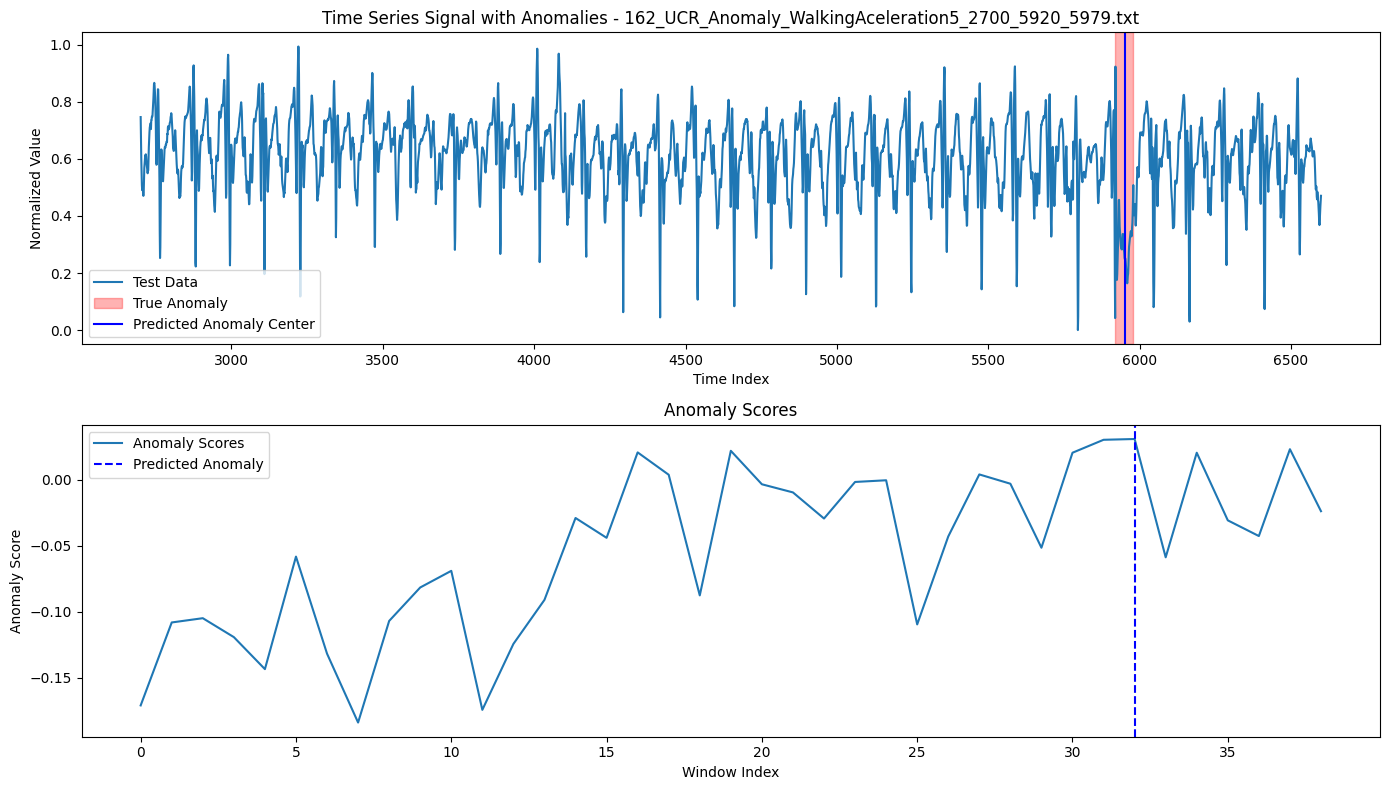

Processing file: 191_UCR_Anomaly_resperation9_38000_143411_143511.txt
Processing file: 034_UCR_Anomaly_DISTORTEDInternalBleeding6_1500_3474_3629.txt
Correct prediction for 034_UCR_Anomaly_DISTORTEDInternalBleeding6_1500_3474_3629.txt.


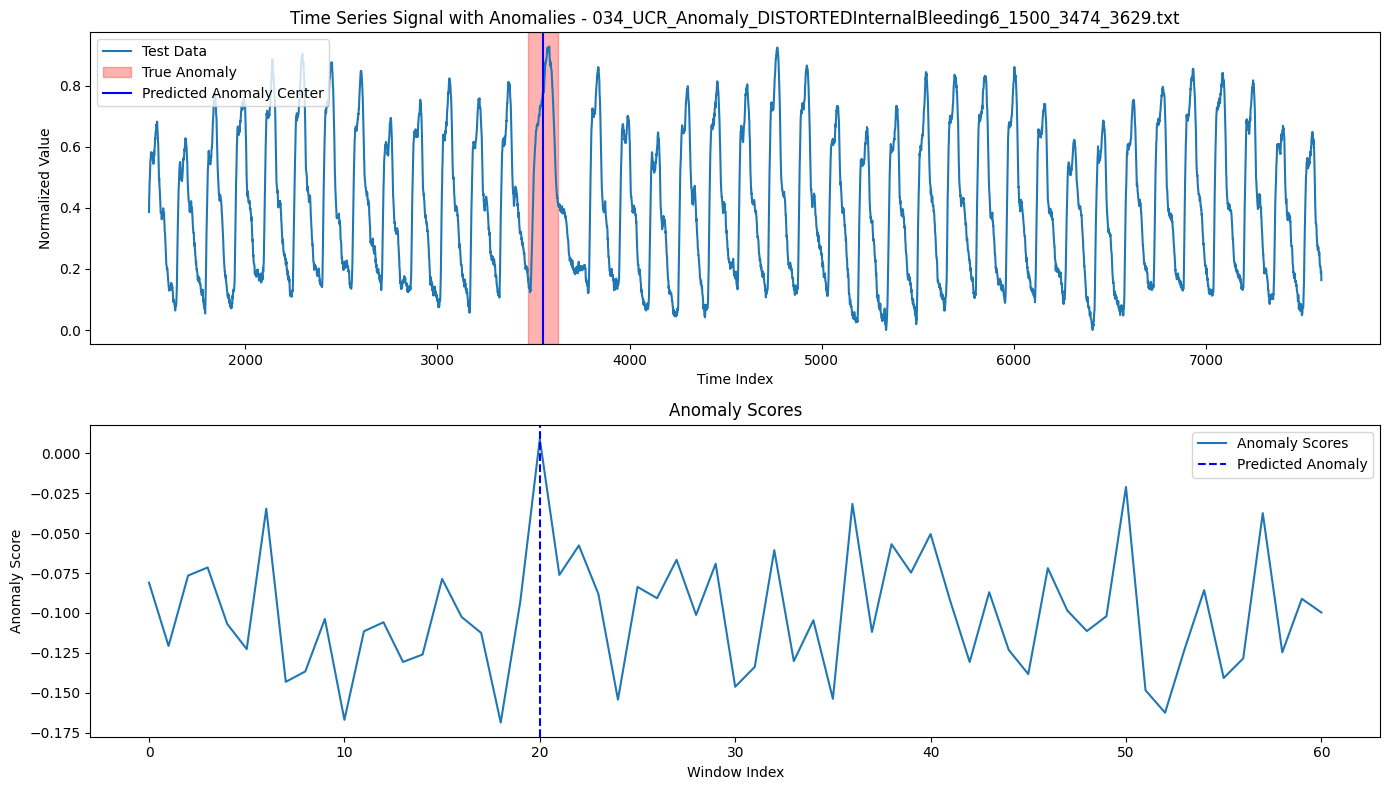

Processing file: 110_UCR_Anomaly_2sddb40_35000_56600_56900.txt
Processing file: 009_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature5_4000_4852_4900.txt
Processing file: 133_UCR_Anomaly_InternalBleeding14_2800_5607_5634.txt
Processing file: 088_UCR_Anomaly_DISTORTEDsel840mECG2_20000_49370_49740.txt
Processing file: 203_UCR_Anomaly_CHARISfive_10500_10995_11028.txt
Processing file: 010_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature6_4000_6006_6054.txt
Processing file: 089_UCR_Anomaly_DISTORTEDtiltAPB1_100000_114283_114350.txt
Processing file: 037_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG1_5000_17210_17260.txt
Correct prediction for 037_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG1_5000_17210_17260.txt.


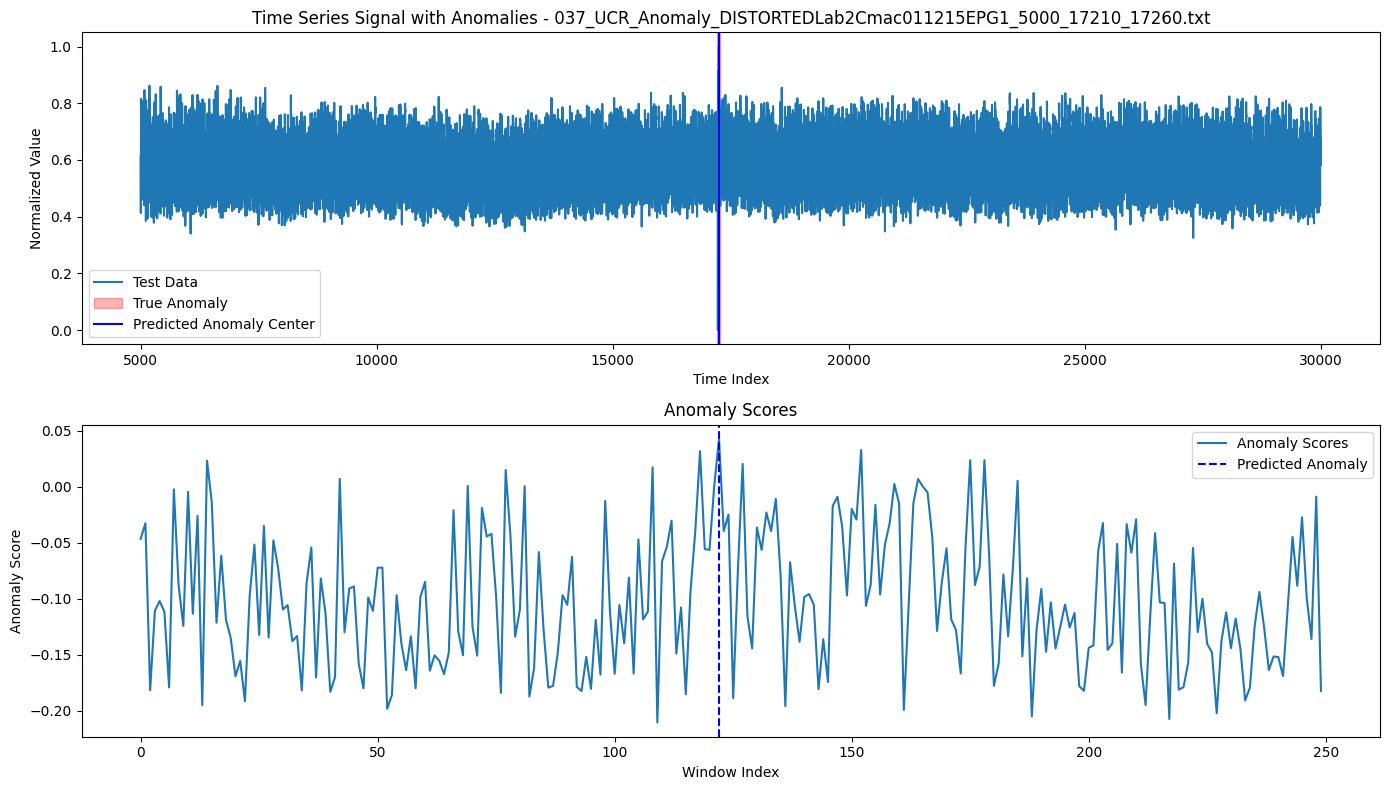

Processing file: 249_UCR_Anomaly_weallwalk_2753_8285_8315.txt
Processing file: 081_UCR_Anomaly_DISTORTEDresperation3_45000_158250_158251.txt
Processing file: 128_UCR_Anomaly_GP711MarkerLFM5z2_5000_7175_7388.txt
Processing file: 201_UCR_Anomaly_CHARISfive_10000_17001_17016.txt
Processing file: 071_UCR_Anomaly_DISTORTEDltstdbs30791AS_23000_52600_52800.txt
Correct prediction for 071_UCR_Anomaly_DISTORTEDltstdbs30791AS_23000_52600_52800.txt.


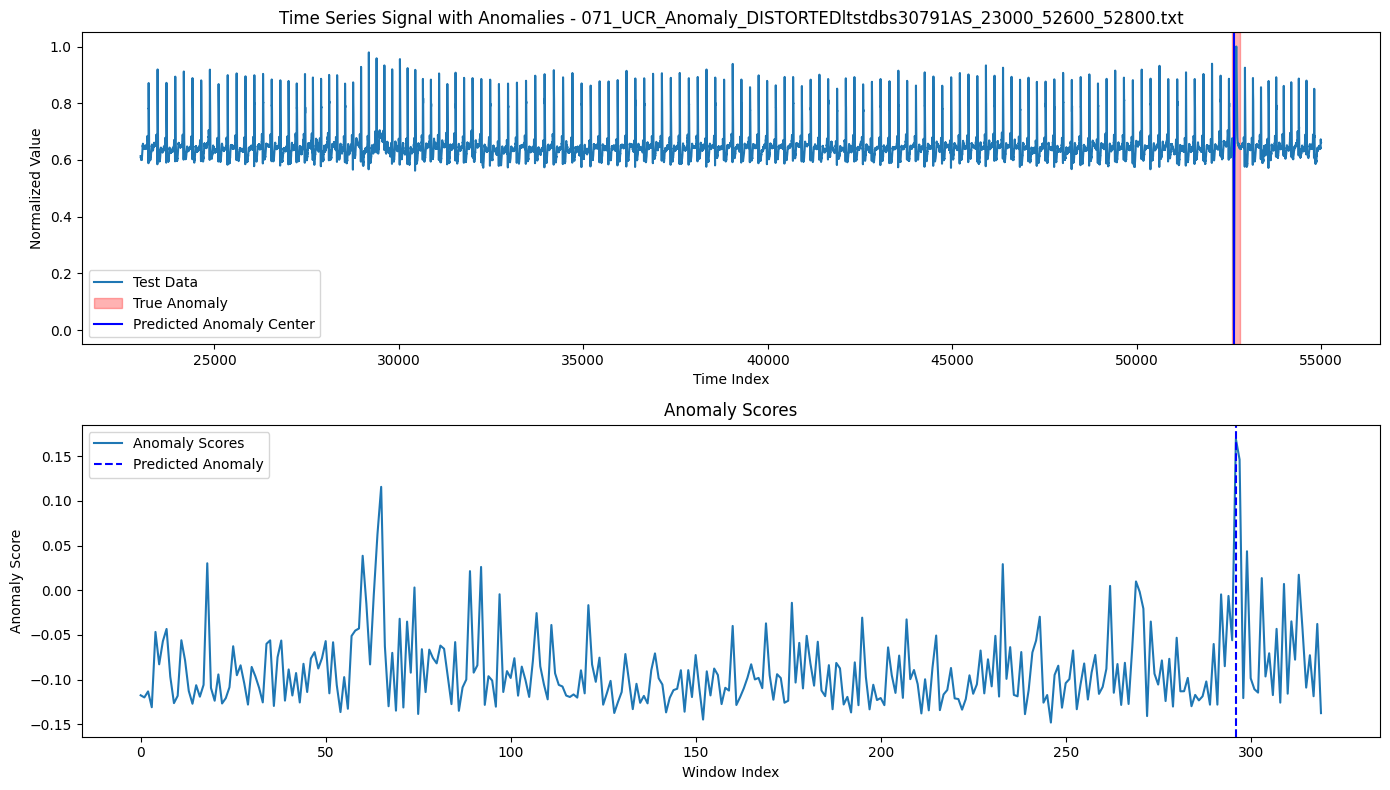

Processing file: 083_UCR_Anomaly_DISTORTEDresperation9_38000_143411_143511.txt
Processing file: 166_UCR_Anomaly_apneaecg_10000_12240_12308.txt
Processing file: 235_UCR_Anomaly_mit14157longtermecg_18913_75450_75451.txt
Processing file: 230_UCR_Anomaly_mit14134longtermecg_19363_19510_19610.txt
Processing file: 091_UCR_Anomaly_DISTORTEDtiltAPB3_40000_114000_114370.txt
Processing file: 148_UCR_Anomaly_Lab2Cmac011215EPG4_6000_17390_17520.txt
Processing file: 049_UCR_Anomaly_DISTORTEDTkeepFirstMARS_3500_5365_5380.txt
Processing file: 175_UCR_Anomaly_insectEPG3_5200_7000_7050.txt
Processing file: 038_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG2_5000_27862_27932.txt
Processing file: 236_UCR_Anomaly_mit14157longtermecg_19313_46350_46390.txt
Processing file: 167_UCR_Anomaly_gait1_20000_38500_38800.txt
Processing file: 243_UCR_Anomaly_tilt12744mtable_100000_203355_203400.txt
Skipping 243_UCR_Anomaly_tilt12744mtable_100000_203355_203400.txt due to empty feature extraction.
Processing file: 187_UCR_Anom

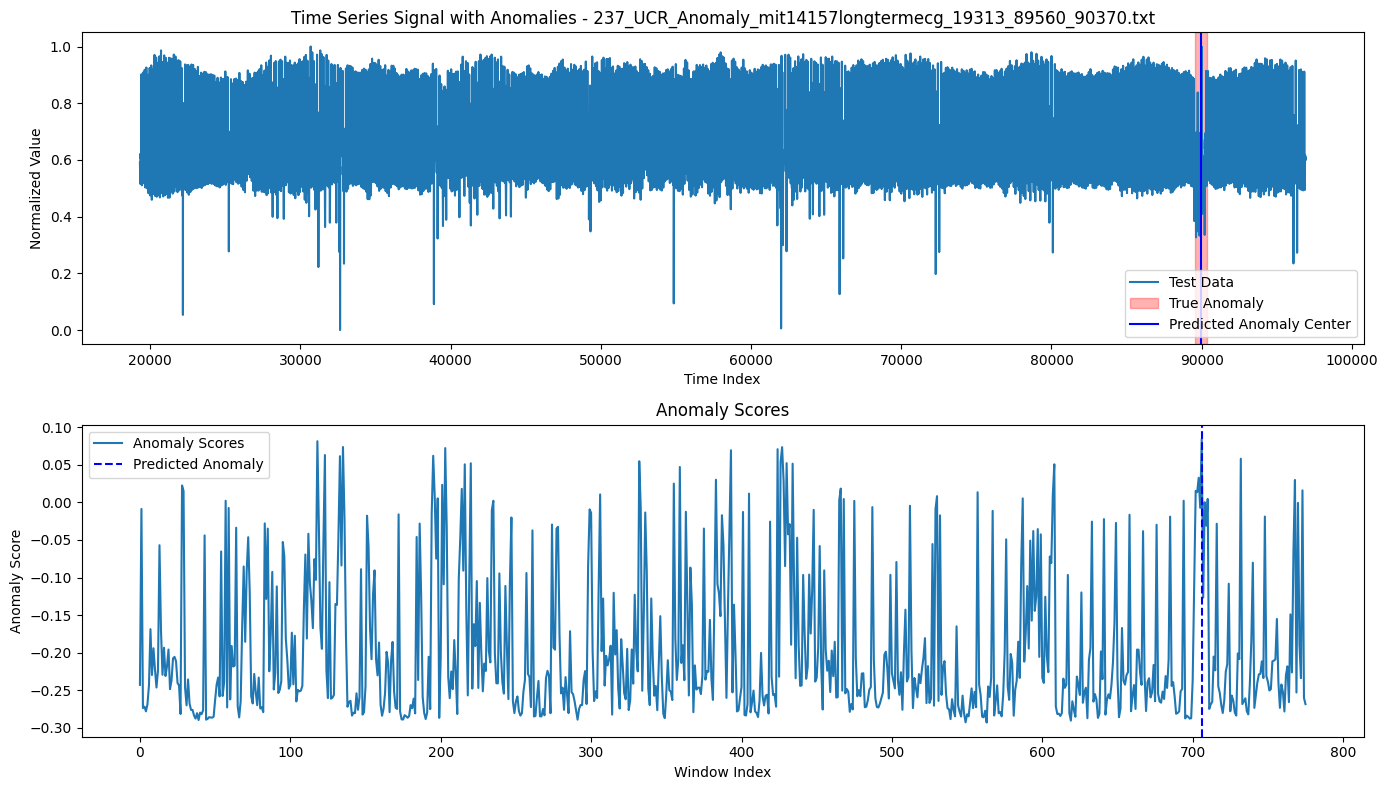

Processing file: 238_UCR_Anomaly_mit14157longtermecg_21311_72600_72780.txt
Processing file: 078_UCR_Anomaly_DISTORTEDresperation1_100000_110260_110412.txt
Processing file: 156_UCR_Anomaly_TkeepFifthMARS_3500_5988_6085.txt
Processing file: 116_UCR_Anomaly_CIMIS44AirTemperature4_4000_5549_5597.txt
Processing file: 011_UCR_Anomaly_DISTORTEDECG1_10000_11800_12100.txt
Processing file: 007_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature3_4000_6520_6544.txt
Processing file: 169_UCR_Anomaly_gait3_24500_59900_60500.txt
Correct prediction for 169_UCR_Anomaly_gait3_24500_59900_60500.txt.


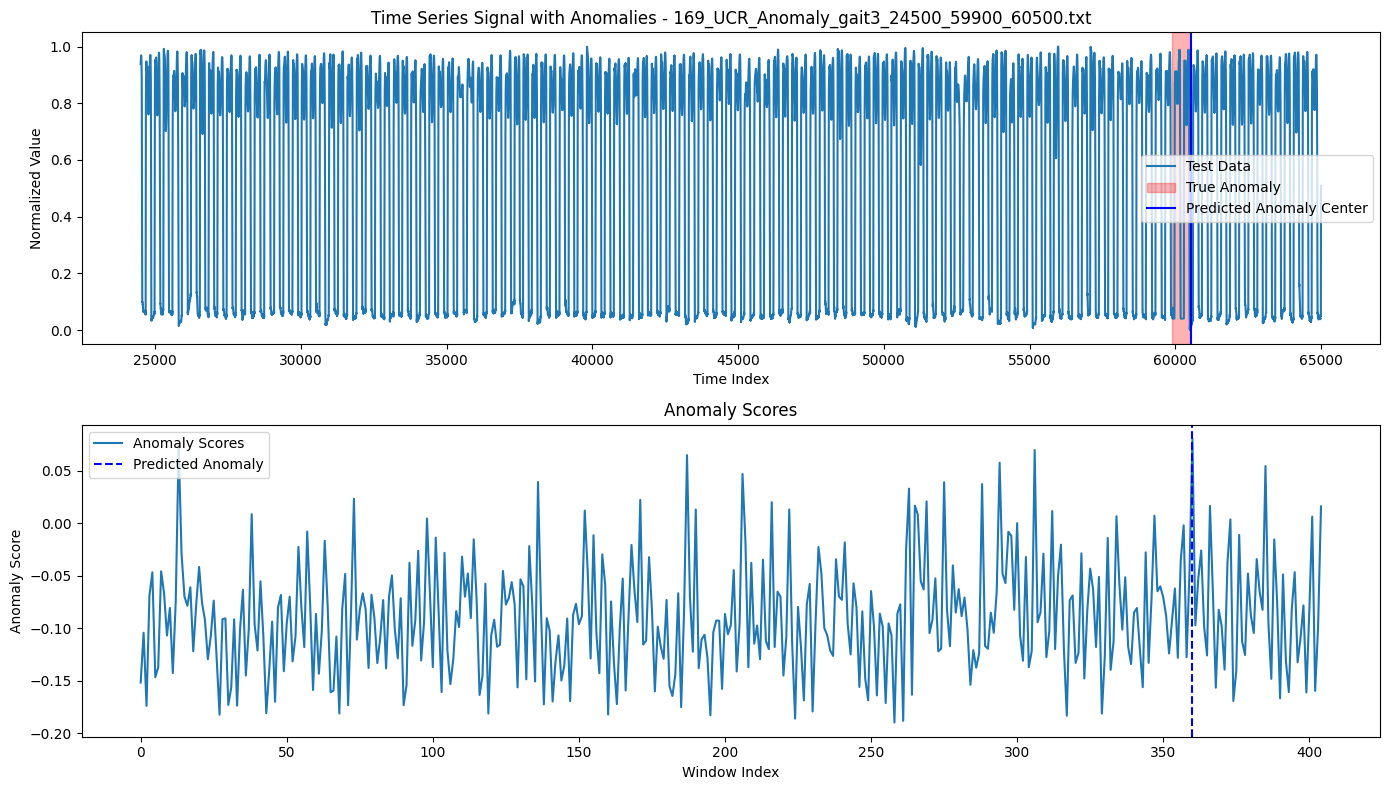

Processing file: 218_UCR_Anomaly_STAFFIIIDatabase_41117_210720_211370.txt
Processing file: 054_UCR_Anomaly_DISTORTEDWalkingAceleration5_2700_5920_5979.txt
Correct prediction for 054_UCR_Anomaly_DISTORTEDWalkingAceleration5_2700_5920_5979.txt.


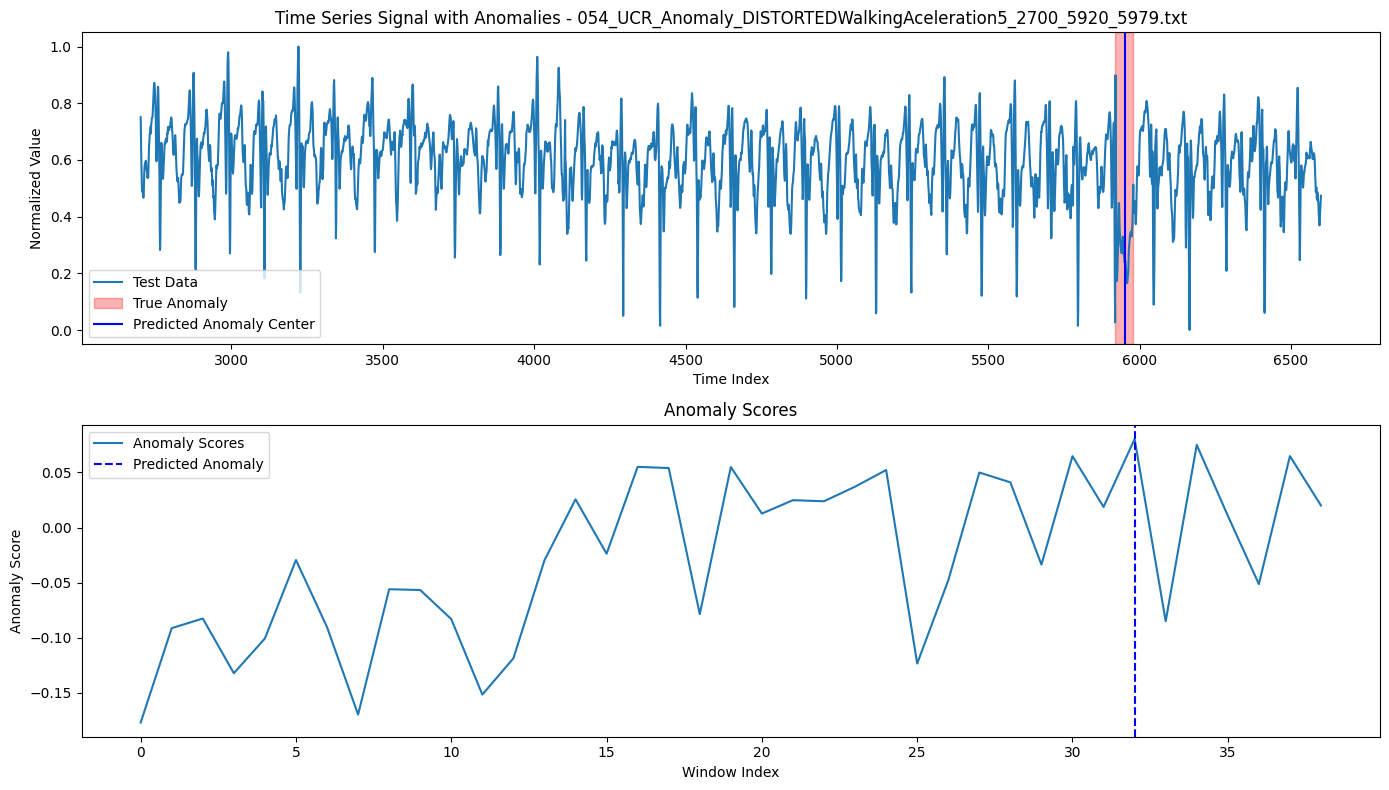

Processing file: 209_UCR_Anomaly_Fantasia_19000_26970_27270.txt
Processing file: 046_UCR_Anomaly_DISTORTEDPowerDemand3_16000_23405_23477.txt
Processing file: 025_UCR_Anomaly_DISTORTEDInternalBleeding14_2800_5607_5634.txt
Processing file: 094_UCR_Anomaly_NOISEBIDMC1_2500_5400_5600.txt
Correct prediction for 094_UCR_Anomaly_NOISEBIDMC1_2500_5400_5600.txt.


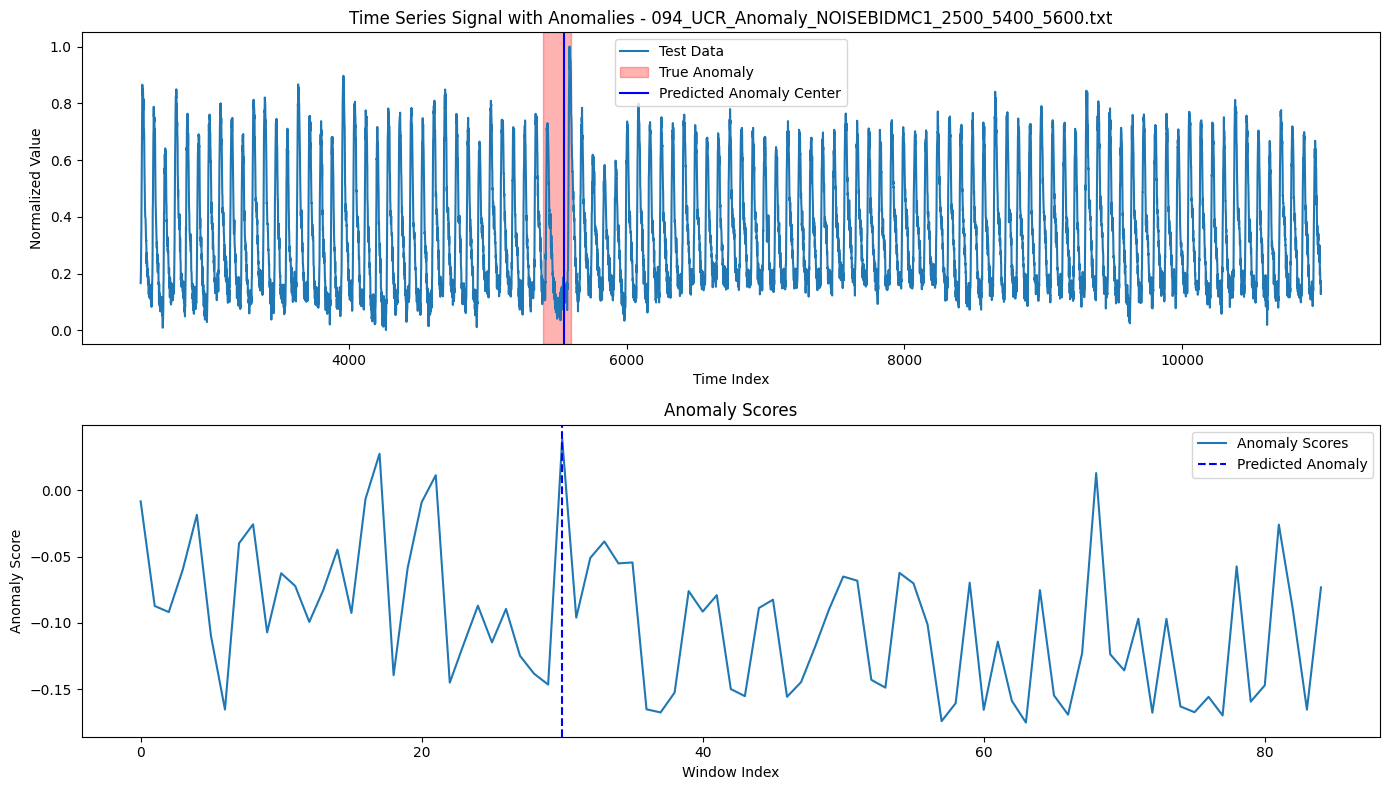

Processing file: 142_UCR_Anomaly_InternalBleeding6_1500_3474_3629.txt
Correct prediction for 142_UCR_Anomaly_InternalBleeding6_1500_3474_3629.txt.


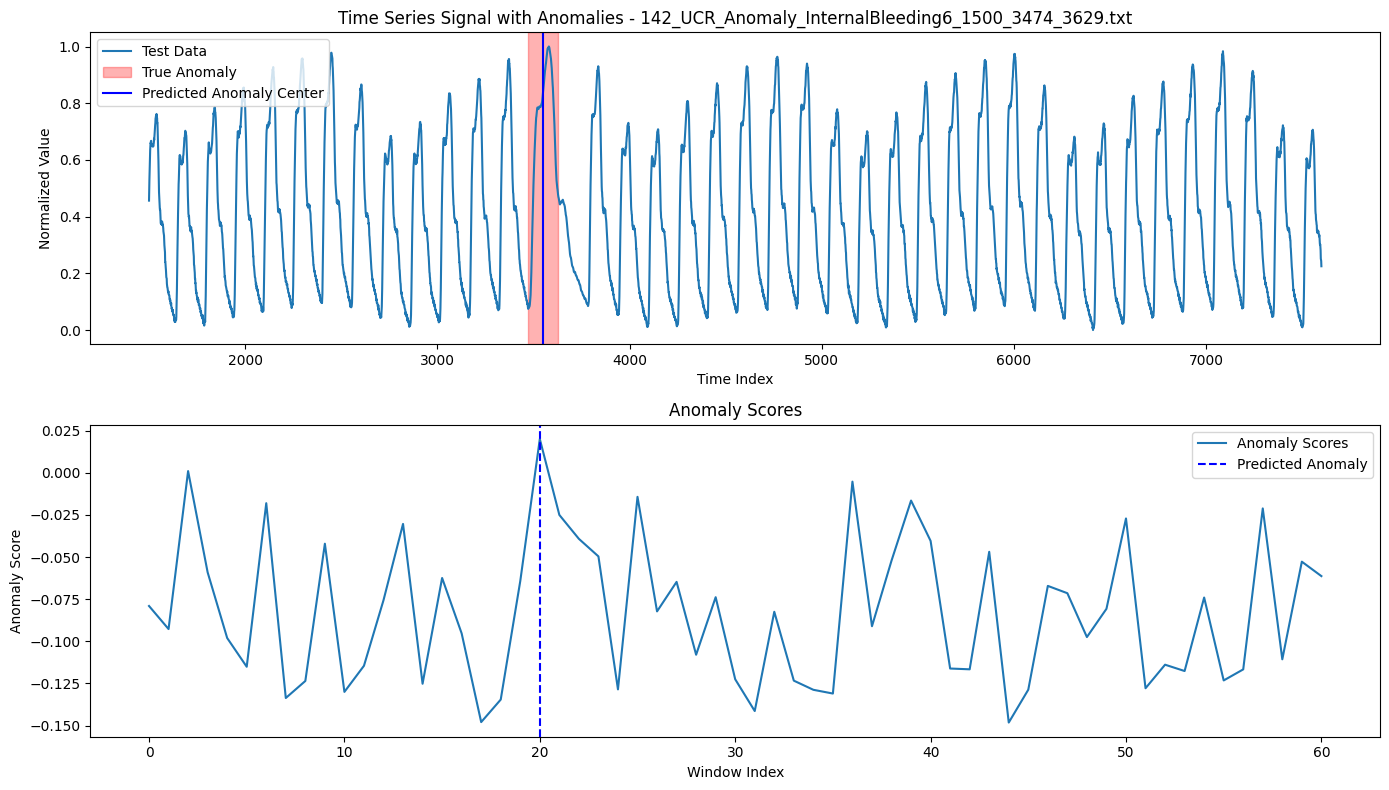

Processing file: 159_UCR_Anomaly_TkeepSecondMARS_3500_9330_9340.txt
Processing file: 206_UCR_Anomaly_CHARISten_25130_29080_29140.txt
Skipping 206_UCR_Anomaly_CHARISten_25130_29080_29140.txt due to empty feature extraction.
Processing file: 138_UCR_Anomaly_InternalBleeding19_3000_4187_4197.txt
Processing file: 123_UCR_Anomaly_ECG4_5000_16800_17100.txt
Processing file: 135_UCR_Anomaly_InternalBleeding16_1200_4187_4199.txt
Processing file: 192_UCR_Anomaly_s20101mML2_12000_35774_35874.txt
Processing file: 185_UCR_Anomaly_resperation11_58000_110800_110801.txt
Processing file: 115_UCR_Anomaly_CIMIS44AirTemperature3_4000_6520_6544.txt
Processing file: 140_UCR_Anomaly_InternalBleeding4_1000_4675_5033.txt
Processing file: 101_UCR_Anomaly_NOISELab2Cmac011215EPG4_6000_17390_17520.txt
Processing file: 080_UCR_Anomaly_DISTORTEDresperation2_30000_168250_168251.txt
Processing file: 119_UCR_Anomaly_ECG1_10000_11800_12100.txt
Processing file: 200_UCR_Anomaly_tiltAPB4_20000_67995_67996.txt
Processing fi

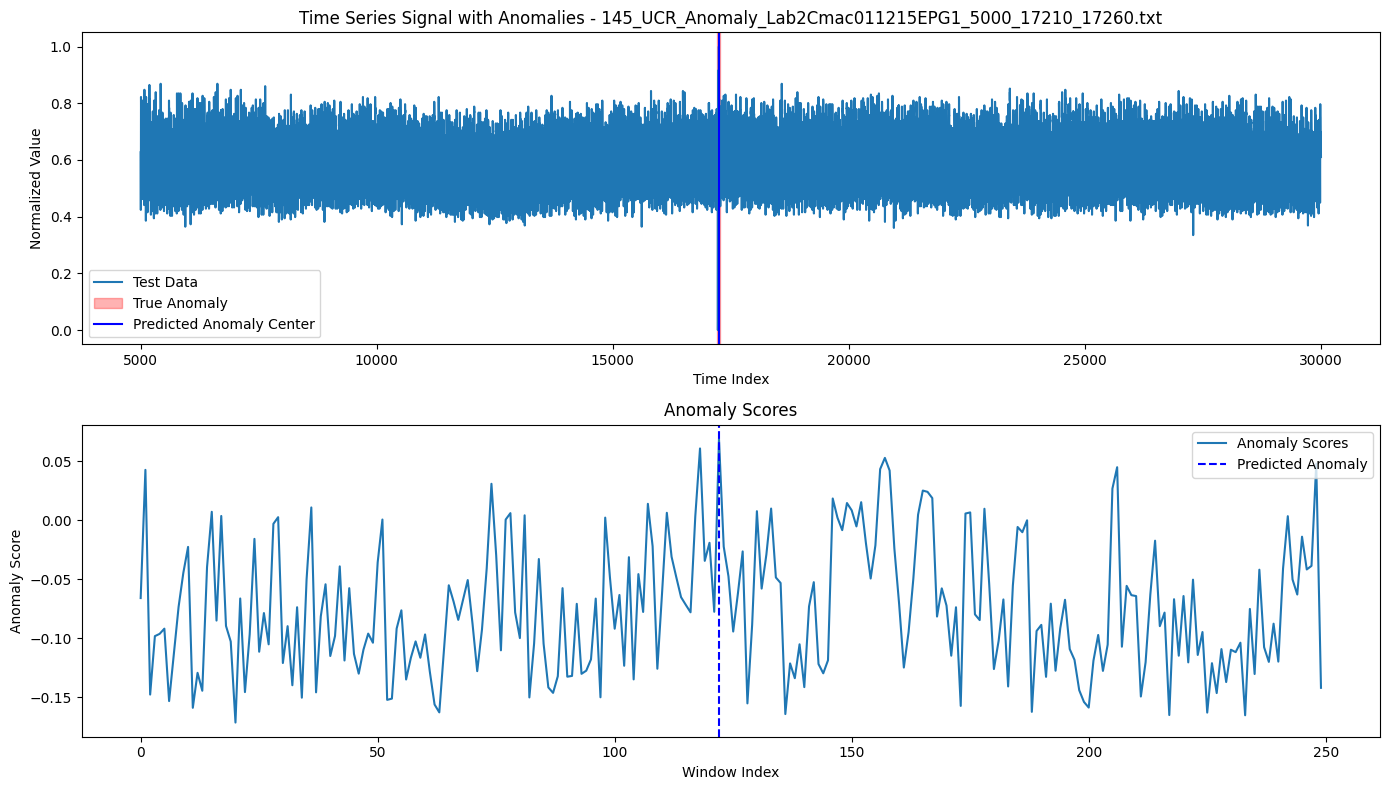

Processing file: 019_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z1_5000_6168_6212.txt
Processing file: 131_UCR_Anomaly_GP711MarkerLFM5z5_5000_8612_8716.txt
Processing file: 127_UCR_Anomaly_GP711MarkerLFM5z1_5000_6168_6212.txt
Processing file: 021_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z3_5000_5948_5993.txt
Processing file: 168_UCR_Anomaly_gait2_22000_46500_46800.txt
Processing file: 065_UCR_Anomaly_DISTORTEDinsectEPG1_3000_7000_7030.txt
Processing file: 154_UCR_Anomaly_PowerDemand3_16000_23405_23477.txt
Processing file: 072_UCR_Anomaly_DISTORTEDltstdbs30791ES_20000_52600_52800.txt
Processing file: 121_UCR_Anomaly_ECG3_15000_16000_16100.txt
Processing file: 076_UCR_Anomaly_DISTORTEDresperation10_48000_130700_131880.txt
Processing file: 029_UCR_Anomaly_DISTORTEDInternalBleeding18_2300_4485_4587.txt
Processing file: 248_UCR_Anomaly_weallwalk_2000_4702_4707.txt
Processing file: 239_UCR_Anomaly_taichidbS0715Master_190037_593450_593514.txt
Processing file: 024_UCR_Anomaly_DISTORTEDInternalBleeding10_3

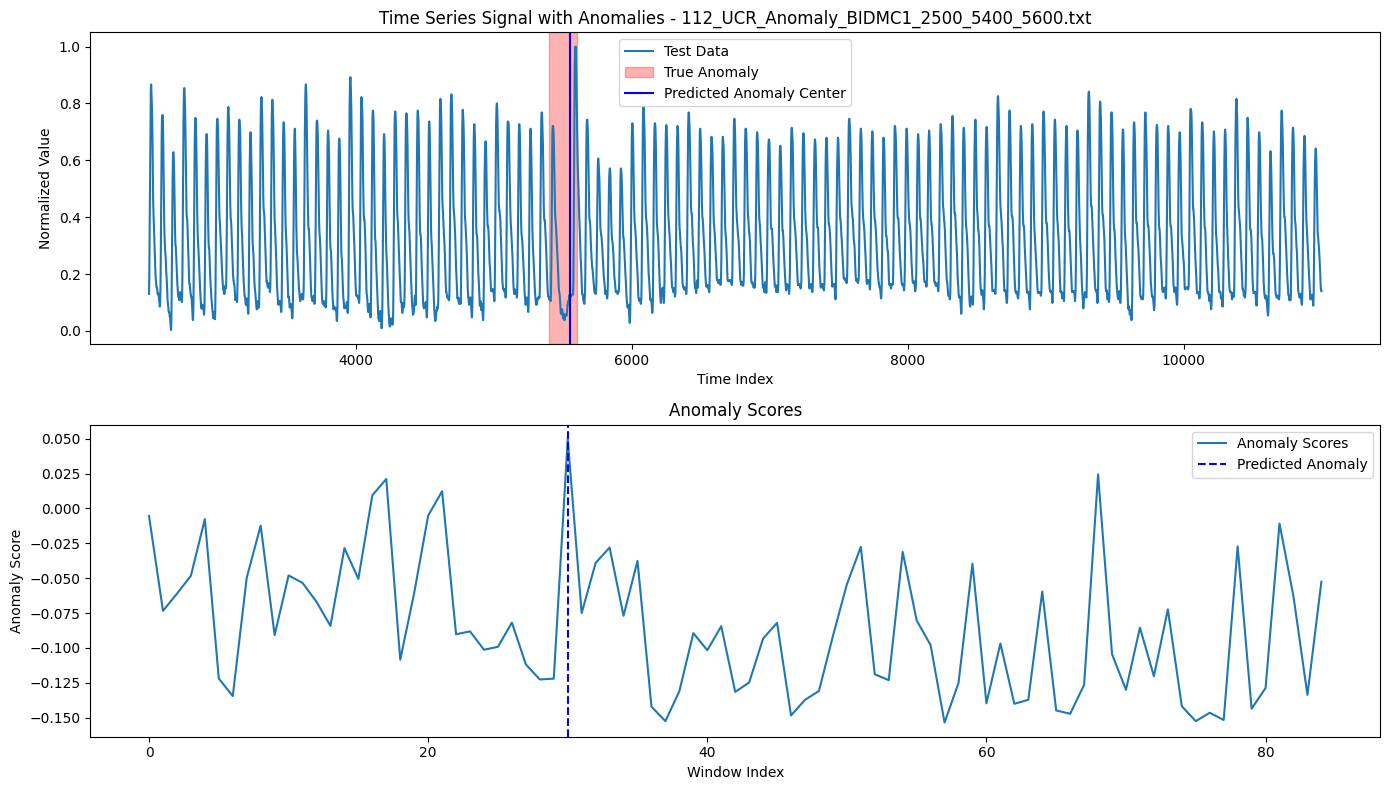

Processing file: 122_UCR_Anomaly_ECG3_8000_17000_17100.txt
Processing file: 100_UCR_Anomaly_NOISELab2Cmac011215EPG1_5000_17210_17260.txt
Correct prediction for 100_UCR_Anomaly_NOISELab2Cmac011215EPG1_5000_17210_17260.txt.


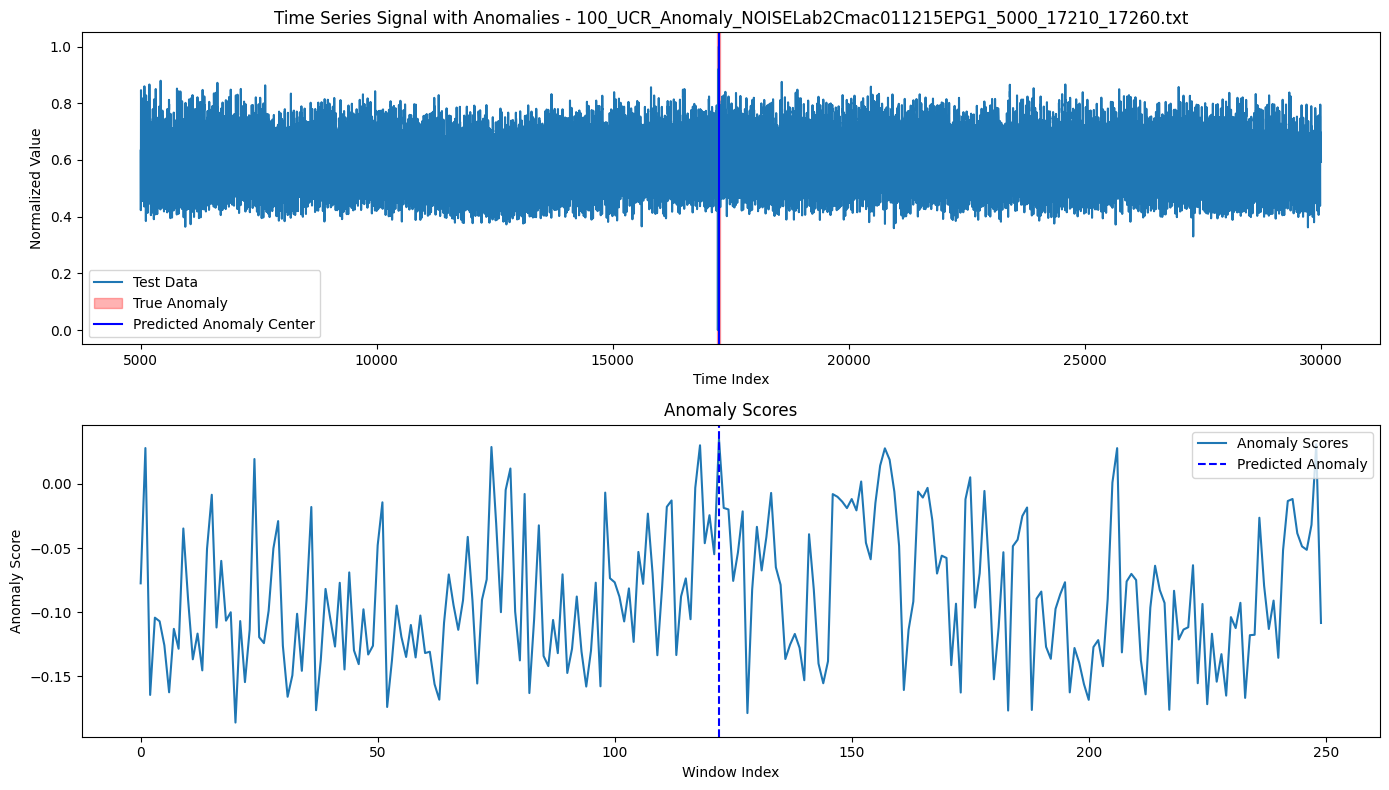

Processing file: 215_UCR_Anomaly_STAFFIIIDatabase_36276_106720_107370.txt
Processing file: 240_UCR_Anomaly_taichidbS0715Master_240030_884100_884200.txt
Processing file: 018_UCR_Anomaly_DISTORTEDECG4_8000_17000_17100.txt
Processing file: 197_UCR_Anomaly_tiltAPB1_100000_114283_114350.txt
Processing file: 050_UCR_Anomaly_DISTORTEDTkeepForthMARS_3500_5988_6085.txt
Processing file: 063_UCR_Anomaly_DISTORTEDgaitHunt2_18500_31200_31850.txt
Processing file: 075_UCR_Anomaly_DISTORTEDqtdbSel100MLII_4000_13400_13800.txt
Processing file: 132_UCR_Anomaly_InternalBleeding10_3200_4526_4556.txt
Processing file: 109_UCR_Anomaly_1sddb40_35000_52000_52620.txt
Processing file: 176_UCR_Anomaly_insectEPG4_1300_6508_6558.txt
Processing file: 098_UCR_Anomaly_NOISEInternalBleeding16_1200_4187_4199.txt


In [5]:
#metrics
correct_predictions = 0
total_files = 0
anomaly_results = {anomaly_type: {'correct': 0, 'total': 0} for anomaly_type in anomaly_types_df['anomaly_type_2'].unique()}
all_true_labels = []
all_predicted_scores = []

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        print(f"Processing file: {filename}")
        total_files += 1
        
        #loading the time series data
        ts = load_time_series(os.path.join(folder_path, filename))
        ts = (ts - np.min(ts)) / (np.max(ts) - np.min(ts))  #normalizing the data

        #parsing filenames to get the anomaly information
        parts = filename[:-4].split('_')
        training_len = int(parts[-3])
        anomaly_start = int(parts[-2])
        anomaly_end = int(parts[-1])

        #extracting features
        train_features = extract_features(ts[:training_len])
        test_features = extract_features(ts[training_len:])
        #ensuring we have non-empty features
        if train_features.size == 0 or test_features.size == 0:
            print(f"Skipping {filename} due to empty feature extraction.")
            continue

        #training Isolation Forest on the training data
        model = IsolationForest(contamination=0.04, random_state=42)
        model.fit(train_features)
        #scoring the test data
        anomaly_scores = model.decision_function(test_features)
        predicted_anomaly_index = np.argmax(-anomaly_scores)  # Index of the highest anomaly score

        
        #predicted anomaly center in the original time series
        predicted_center = predicted_anomaly_index * 100 + training_len + 50

        #checking to see if the prediction is correct
        is_correct = evaluate_prediction(predicted_center, anomaly_start, anomaly_end)
        if is_correct:
            print(f"Correct prediction for {filename}.")
            correct_predictions += 1

        #getting the anomaly type and tracking the anomaly results by type
        anomaly_type = filename_to_anomaly_type.get(filename, "Unknown")
        if anomaly_type in anomaly_results:
            anomaly_results[anomaly_type]['total'] += 1
            if is_correct:
                anomaly_results[anomaly_type]['correct'] += 1

                #plotting the results only for true cases
                plt.figure(figsize=(14, 8))
                #Time Series Signal
                plt.subplot(2, 1, 1)
                test_range = range(training_len, training_len + len(test_features) * 100)
                plt.plot(test_range, ts[training_len:training_len + len(test_features) * 100], label='Test Data')
                plt.axvspan(anomaly_start, anomaly_end, color='red', alpha=0.3, label='True Anomaly')
                plt.axvline(predicted_center, color='blue', label='Predicted Anomaly Center')
                plt.title(f'Time Series Signal with Anomalies - {filename}')
                plt.xlabel('Time Index')
                plt.ylabel('Normalized Value')
                plt.legend()
        
                #Anomaly Scores
                plt.subplot(2, 1, 2)
                plt.plot(range(len(anomaly_scores)), -anomaly_scores, label='Anomaly Scores')
                plt.axvline(predicted_anomaly_index, color='blue', linestyle='--', label='Predicted Anomaly')
                plt.title('Anomaly Scores')
                plt.xlabel('Window Index')
                plt.ylabel('Anomaly Score')
                plt.legend()
                plt.tight_layout()
                plt.show()




        
        #overall metrics calculation
        true_labels = np.zeros(len(anomaly_scores))
        true_labels[anomaly_start // 100:(anomaly_end // 100) + 1] = 1  # Mark the anomaly region
        all_true_labels.extend(true_labels)
        all_predicted_scores.extend(-anomaly_scores)  # Invert scores for AUC/ROC as the higher score indicates an anomaly

        

## Summary

In [43]:
#calculating overall accuracy
accuracy = correct_predictions / total_files if total_files > 0 else 0
print(f"Overall Accuracy: {accuracy:.4f}")

#F1 score, AUC ROC
f1 = f1_score(all_true_labels, [1 if score > 0 else 0 for score in all_predicted_scores])
roc_auc = roc_auc_score(all_true_labels, all_predicted_scores)
print(f"F1 Score: {f1:.4f}")
print(f"AUC ROC: {roc_auc:.4f}")



#detailed results for each anomaly type
for anomaly_type, result in anomaly_results.items():
    correct = result['correct']
    total = result['total']
    print(f"Anomaly type: {anomaly_type}, Correct predictions: {correct}, Total cases: {total}, Accuracy: {correct/total if total > 0 else 0:.4f}")


Overall Accuracy: 0.1080
F1 Score: 0.0139
AUC ROC: 0.6130
UCR Score: 0.1080
Anomaly type: unusual_pattern, Correct predictions: 1, Total cases: 25, Accuracy: 0.0400
Anomaly type: missing_drop, Correct predictions: 0, Total cases: 4, Accuracy: 0.0000
Anomaly type: noise, Correct predictions: 2, Total cases: 23, Accuracy: 0.0870
Anomaly type: missing_peak, Correct predictions: 2, Total cases: 14, Accuracy: 0.1429
Anomaly type: local_drop, Correct predictions: 4, Total cases: 21, Accuracy: 0.1905
Anomaly type: local_peak, Correct predictions: 1, Total cases: 26, Accuracy: 0.0385
Anomaly type: outlier, Correct predictions: 4, Total cases: 22, Accuracy: 0.1818
Anomaly type: amplitude_change, Correct predictions: 5, Total cases: 23, Accuracy: 0.2174
Anomaly type: reversed, Correct predictions: 3, Total cases: 21, Accuracy: 0.1429
Anomaly type: frequency_change, Correct predictions: 4, Total cases: 26, Accuracy: 0.1538
Anomaly type: time_warping, Correct predictions: 0, Total cases: 4, Accura